In [1]:
#This is to create the best turbidity model and save it


In [2]:
import numpy as np
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split, KFold
from sklearn.metrics import mean_squared_error


import tensorflow.keras as keras


In [4]:
df = pd.read_csv(os.path.join("data", "final_df_big.csv"))

In [4]:


x_arr = np.array(df_no_date.drop(columns=['Turbidity (NTU)']), np.float32)
x_shaped = x_arr.reshape(x_arr.shape[0], 1, x_arr.shape[1])

y_shaped = df_no_date['Turbidity (NTU)'].values

kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(x_shaped)

print(kf)


KFold(n_splits=5, random_state=None, shuffle=True)


In [5]:
model = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[None, x_shaped.shape[2]]),
    keras.layers.GRU(144, return_sequences=True, activation='relu'),
    keras.layers.Reshape(target_shape=(12,12)),
    keras.layers.Conv1D(filters=128, kernel_size=4, strides=1, padding='same',activation='relu'),
    keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    keras.layers.MaxPooling1D((2), strides=None),
    keras.layers.AveragePooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8, ),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 100)         32700     
                                                                 
 gru_1 (GRU)                 (None, None, 144)         106272    
                                                                 
 reshape (Reshape)           (None, 12, 12)            0         
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           6272      
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            32832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                        

In [21]:

cb = [keras.callbacks.ModelCheckpoint("best_model", monitor='loss', save_best_only=True)]

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00010),  
              loss='mse',
              metrics=keras.metrics.RootMeanSquaredError()
        )

In [23]:
models = []
histories = []  
model_evals = []
for train_index, test_index in kf.split(x_shaped):
    x_train, x_test = x_shaped[train_index], x_shaped[test_index]
    y_train, y_test = y_shaped[train_index], y_shaped[test_index]
    

    history = model.fit(x_train,y_train,epochs=200, callbacks=cb)
    
    model_eval = model.evaluate(x_test, y_test)
    models.append(model)
    histories.append(history)
    model_evals.append(model_eval)
        

Epoch 1/200
1100/1110 [============================>.] - ETA: 0s - loss: 292.6717 - root_mean_squared_error: 17.1077

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 291.9434 - root_mean_squared_error: 17.0864
Epoch 2/200
1102/1110 [============================>.] - ETA: 0s - loss: 280.6763 - root_mean_squared_error: 16.7534

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 280.6307 - root_mean_squared_error: 16.7520
Epoch 3/200
1103/1110 [============================>.] - ETA: 0s - loss: 270.2235 - root_mean_squared_error: 16.4385

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 270.8605 - root_mean_squared_error: 16.4578
Epoch 4/200
1104/1110 [============================>.] - ETA: 0s - loss: 261.4247 - root_mean_squared_error: 16.1686

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 261.6318 - root_mean_squared_error: 16.1750
Epoch 5/200
1110/1110 [==============================] - ETA: 0s - loss: 253.6142 - root_mean_squared_error: 15.9253

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 253.6142 - root_mean_squared_error: 15.9253
Epoch 6/200
1100/1110 [============================>.] - ETA: 0s - loss: 246.5467 - root_mean_squared_error: 15.7018

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 246.3600 - root_mean_squared_error: 15.6959
Epoch 7/200
1105/1110 [============================>.] - ETA: 0s - loss: 241.0624 - root_mean_squared_error: 15.5262

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 240.8302 - root_mean_squared_error: 15.5187
Epoch 8/200
1109/1110 [============================>.] - ETA: 0s - loss: 234.3431 - root_mean_squared_error: 15.3083

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 234.3888 - root_mean_squared_error: 15.3098
Epoch 9/200
1103/1110 [============================>.] - ETA: 0s - loss: 228.5052 - root_mean_squared_error: 15.1164

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 228.5848 - root_mean_squared_error: 15.1190
Epoch 10/200
1105/1110 [============================>.] - ETA: 0s - loss: 224.1118 - root_mean_squared_error: 14.9704

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 224.2009 - root_mean_squared_error: 14.9733
Epoch 11/200
1107/1110 [============================>.] - ETA: 0s - loss: 218.1440 - root_mean_squared_error: 14.7697

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 218.1411 - root_mean_squared_error: 14.7696
Epoch 12/200
1100/1110 [============================>.] - ETA: 0s - loss: 213.3200 - root_mean_squared_error: 14.6055

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 213.4000 - root_mean_squared_error: 14.6082
Epoch 13/200
1110/1110 [==============================] - ETA: 0s - loss: 209.5497 - root_mean_squared_error: 14.4758

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 209.5497 - root_mean_squared_error: 14.4758
Epoch 14/200
1107/1110 [============================>.] - ETA: 0s - loss: 205.0998 - root_mean_squared_error: 14.3213

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 205.1698 - root_mean_squared_error: 14.3238
Epoch 15/200
1106/1110 [============================>.] - ETA: 0s - loss: 201.8830 - root_mean_squared_error: 14.2086

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 202.1093 - root_mean_squared_error: 14.2165
Epoch 16/200
1107/1110 [============================>.] - ETA: 0s - loss: 198.0182 - root_mean_squared_error: 14.0719

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 198.2236 - root_mean_squared_error: 14.0792
Epoch 17/200
1101/1110 [============================>.] - ETA: 0s - loss: 194.6237 - root_mean_squared_error: 13.9508

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 194.4284 - root_mean_squared_error: 13.9438
Epoch 18/200
1108/1110 [============================>.] - ETA: 0s - loss: 191.2400 - root_mean_squared_error: 13.8290

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 191.2692 - root_mean_squared_error: 13.8300
Epoch 19/200
1100/1110 [============================>.] - ETA: 0s - loss: 188.9768 - root_mean_squared_error: 13.7469

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 188.9942 - root_mean_squared_error: 13.7475
Epoch 20/200
1109/1110 [============================>.] - ETA: 0s - loss: 185.8817 - root_mean_squared_error: 13.6338

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 185.8603 - root_mean_squared_error: 13.6331
Epoch 21/200
1110/1110 [==============================] - ETA: 0s - loss: 183.0106 - root_mean_squared_error: 13.5281

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 183.0106 - root_mean_squared_error: 13.5281
Epoch 22/200
1106/1110 [============================>.] - ETA: 0s - loss: 180.4086 - root_mean_squared_error: 13.4316

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 180.3727 - root_mean_squared_error: 13.4303
Epoch 23/200
1104/1110 [============================>.] - ETA: 0s - loss: 179.2960 - root_mean_squared_error: 13.3901

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 179.0007 - root_mean_squared_error: 13.3791
Epoch 24/200
1107/1110 [============================>.] - ETA: 0s - loss: 175.8498 - root_mean_squared_error: 13.2608

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 175.8260 - root_mean_squared_error: 13.2599
Epoch 25/200
1109/1110 [============================>.] - ETA: 0s - loss: 173.9686 - root_mean_squared_error: 13.1897

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 173.9452 - root_mean_squared_error: 13.1888
Epoch 26/200
1106/1110 [============================>.] - ETA: 0s - loss: 171.4812 - root_mean_squared_error: 13.0951

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 171.6232 - root_mean_squared_error: 13.1005
Epoch 27/200
1103/1110 [============================>.] - ETA: 0s - loss: 169.1568 - root_mean_squared_error: 13.0060

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 169.0794 - root_mean_squared_error: 13.0031
Epoch 28/200
1104/1110 [============================>.] - ETA: 0s - loss: 167.9475 - root_mean_squared_error: 12.9595

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 167.9292 - root_mean_squared_error: 12.9588
Epoch 29/200
1102/1110 [============================>.] - ETA: 0s - loss: 166.0120 - root_mean_squared_error: 12.8846

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 165.9583 - root_mean_squared_error: 12.8825
Epoch 30/200
1103/1110 [============================>.] - ETA: 0s - loss: 164.5161 - root_mean_squared_error: 12.8264

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 164.7991 - root_mean_squared_error: 12.8374
Epoch 31/200
1103/1110 [============================>.] - ETA: 0s - loss: 162.1702 - root_mean_squared_error: 12.7346

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 162.8932 - root_mean_squared_error: 12.7630
Epoch 32/200
1105/1110 [============================>.] - ETA: 0s - loss: 161.6641 - root_mean_squared_error: 12.7147

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 161.4283 - root_mean_squared_error: 12.7054
Epoch 33/200
1105/1110 [============================>.] - ETA: 0s - loss: 159.5754 - root_mean_squared_error: 12.6323

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 159.4161 - root_mean_squared_error: 12.6260
Epoch 34/200
1110/1110 [==============================] - ETA: 0s - loss: 158.1825 - root_mean_squared_error: 12.5771

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 158.1825 - root_mean_squared_error: 12.5771
Epoch 35/200
1110/1110 [==============================] - ETA: 0s - loss: 156.4598 - root_mean_squared_error: 12.5084

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 156.4598 - root_mean_squared_error: 12.5084
Epoch 36/200
1102/1110 [============================>.] - ETA: 0s - loss: 154.9874 - root_mean_squared_error: 12.4494

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 155.0300 - root_mean_squared_error: 12.4511
Epoch 37/200
1109/1110 [============================>.] - ETA: 0s - loss: 153.8001 - root_mean_squared_error: 12.4016

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 153.8396 - root_mean_squared_error: 12.4032
Epoch 38/200
1100/1110 [============================>.] - ETA: 0s - loss: 150.5920 - root_mean_squared_error: 12.2716

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 151.3593 - root_mean_squared_error: 12.3028
Epoch 39/200
1110/1110 [==============================] - 6s 5ms/step - loss: 151.6642 - root_mean_squared_error: 12.3152
Epoch 40/200
1104/1110 [============================>.] - ETA: 0s - loss: 150.4138 - root_mean_squared_error: 12.2643

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 150.0554 - root_mean_squared_error: 12.2497
Epoch 41/200
1100/1110 [============================>.] - ETA: 0s - loss: 147.7832 - root_mean_squared_error: 12.1566

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 148.0056 - root_mean_squared_error: 12.1658
Epoch 42/200
1110/1110 [==============================] - ETA: 0s - loss: 147.5908 - root_mean_squared_error: 12.1487

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 147.5908 - root_mean_squared_error: 12.1487
Epoch 43/200
1103/1110 [============================>.] - ETA: 0s - loss: 145.5662 - root_mean_squared_error: 12.0651

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 145.4576 - root_mean_squared_error: 12.0606
Epoch 44/200
1104/1110 [============================>.] - ETA: 0s - loss: 143.6221 - root_mean_squared_error: 11.9842

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 143.9107 - root_mean_squared_error: 11.9963
Epoch 45/200
1110/1110 [==============================] - 6s 5ms/step - loss: 144.3710 - root_mean_squared_error: 12.0154
Epoch 46/200
1104/1110 [============================>.] - ETA: 0s - loss: 143.9151 - root_mean_squared_error: 11.9965

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 143.5459 - root_mean_squared_error: 11.9811
Epoch 47/200
1108/1110 [============================>.] - ETA: 0s - loss: 141.9411 - root_mean_squared_error: 11.9139

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 141.9312 - root_mean_squared_error: 11.9135
Epoch 48/200
1109/1110 [============================>.] - ETA: 0s - loss: 140.6546 - root_mean_squared_error: 11.8598

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 140.6521 - root_mean_squared_error: 11.8597
Epoch 49/200
1105/1110 [============================>.] - ETA: 0s - loss: 140.1582 - root_mean_squared_error: 11.8388

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 140.1219 - root_mean_squared_error: 11.8373
Epoch 50/200
1098/1110 [============================>.] - ETA: 0s - loss: 138.1678 - root_mean_squared_error: 11.7545

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 138.3434 - root_mean_squared_error: 11.7619
Epoch 51/200
1104/1110 [============================>.] - ETA: 0s - loss: 137.4126 - root_mean_squared_error: 11.7223

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 137.4875 - root_mean_squared_error: 11.7255
Epoch 52/200
1109/1110 [============================>.] - ETA: 0s - loss: 137.3211 - root_mean_squared_error: 11.7184

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 137.3396 - root_mean_squared_error: 11.7192
Epoch 53/200
1100/1110 [============================>.] - ETA: 0s - loss: 135.5333 - root_mean_squared_error: 11.6419

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 135.7646 - root_mean_squared_error: 11.6518
Epoch 54/200
1110/1110 [==============================] - ETA: 0s - loss: 134.9058 - root_mean_squared_error: 11.6149

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 134.9058 - root_mean_squared_error: 11.6149
Epoch 55/200
1110/1110 [==============================] - ETA: 0s - loss: 134.4087 - root_mean_squared_error: 11.5935

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 134.4087 - root_mean_squared_error: 11.5935
Epoch 56/200
1099/1110 [============================>.] - ETA: 0s - loss: 133.4184 - root_mean_squared_error: 11.5507

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 133.4791 - root_mean_squared_error: 11.5533
Epoch 57/200
1105/1110 [============================>.] - ETA: 0s - loss: 132.7693 - root_mean_squared_error: 11.5226

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 132.8663 - root_mean_squared_error: 11.5268
Epoch 58/200
1100/1110 [============================>.] - ETA: 0s - loss: 131.6081 - root_mean_squared_error: 11.4721

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 131.4821 - root_mean_squared_error: 11.4666
Epoch 59/200
1108/1110 [============================>.] - ETA: 0s - loss: 130.1448 - root_mean_squared_error: 11.4081

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 130.2530 - root_mean_squared_error: 11.4128
Epoch 60/200
1109/1110 [============================>.] - ETA: 0s - loss: 130.1061 - root_mean_squared_error: 11.4064

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 130.0795 - root_mean_squared_error: 11.4052
Epoch 61/200
1105/1110 [============================>.] - ETA: 0s - loss: 129.6367 - root_mean_squared_error: 11.3858

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 129.5459 - root_mean_squared_error: 11.3818
Epoch 62/200
1107/1110 [============================>.] - ETA: 0s - loss: 128.3984 - root_mean_squared_error: 11.3313

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 128.3582 - root_mean_squared_error: 11.3295
Epoch 63/200
1108/1110 [============================>.] - ETA: 0s - loss: 127.9705 - root_mean_squared_error: 11.3124

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 127.9334 - root_mean_squared_error: 11.3108
Epoch 64/200
1104/1110 [============================>.] - ETA: 0s - loss: 127.0035 - root_mean_squared_error: 11.2696

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 127.1932 - root_mean_squared_error: 11.2780
Epoch 65/200
1109/1110 [============================>.] - ETA: 0s - loss: 126.2415 - root_mean_squared_error: 11.2357

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 126.2231 - root_mean_squared_error: 11.2349
Epoch 66/200
1106/1110 [============================>.] - ETA: 0s - loss: 125.3452 - root_mean_squared_error: 11.1958

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 125.3443 - root_mean_squared_error: 11.1957
Epoch 67/200
1109/1110 [============================>.] - ETA: 0s - loss: 124.7728 - root_mean_squared_error: 11.1702

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 124.7579 - root_mean_squared_error: 11.1695
Epoch 68/200
1104/1110 [============================>.] - ETA: 0s - loss: 123.6016 - root_mean_squared_error: 11.1176

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 123.9441 - root_mean_squared_error: 11.1330
Epoch 69/200
1102/1110 [============================>.] - ETA: 0s - loss: 121.8391 - root_mean_squared_error: 11.0381

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 122.5974 - root_mean_squared_error: 11.0724
Epoch 70/200
1108/1110 [============================>.] - ETA: 0s - loss: 122.3295 - root_mean_squared_error: 11.0603

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 122.2894 - root_mean_squared_error: 11.0585
Epoch 71/200
1106/1110 [============================>.] - ETA: 0s - loss: 121.5531 - root_mean_squared_error: 11.0251

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 121.6696 - root_mean_squared_error: 11.0304
Epoch 72/200
1105/1110 [============================>.] - ETA: 0s - loss: 121.7041 - root_mean_squared_error: 11.0320

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 121.5862 - root_mean_squared_error: 11.0266
Epoch 73/200
1105/1110 [============================>.] - ETA: 0s - loss: 120.2521 - root_mean_squared_error: 10.9660

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 120.4415 - root_mean_squared_error: 10.9746
Epoch 74/200
1106/1110 [============================>.] - ETA: 0s - loss: 120.3202 - root_mean_squared_error: 10.9691

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 120.1998 - root_mean_squared_error: 10.9636
Epoch 75/200
1105/1110 [============================>.] - ETA: 0s - loss: 119.5306 - root_mean_squared_error: 10.9330

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 119.6423 - root_mean_squared_error: 10.9381
Epoch 76/200
1104/1110 [============================>.] - ETA: 0s - loss: 119.6029 - root_mean_squared_error: 10.9363

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 119.5165 - root_mean_squared_error: 10.9324
Epoch 77/200
1105/1110 [============================>.] - ETA: 0s - loss: 118.1438 - root_mean_squared_error: 10.8694

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 117.8981 - root_mean_squared_error: 10.8581
Epoch 78/200
1107/1110 [============================>.] - ETA: 0s - loss: 117.2401 - root_mean_squared_error: 10.8277

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 117.2972 - root_mean_squared_error: 10.8304
Epoch 79/200
1110/1110 [==============================] - 6s 6ms/step - loss: 117.7412 - root_mean_squared_error: 10.8509
Epoch 80/200
1105/1110 [============================>.] - ETA: 0s - loss: 116.1912 - root_mean_squared_error: 10.7792

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 9ms/step - loss: 116.1097 - root_mean_squared_error: 10.7754
Epoch 81/200
1109/1110 [============================>.] - ETA: 0s - loss: 115.4565 - root_mean_squared_error: 10.7451

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 115.4740 - root_mean_squared_error: 10.7459
Epoch 82/200
1106/1110 [============================>.] - ETA: 0s - loss: 114.8888 - root_mean_squared_error: 10.7186

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 114.9141 - root_mean_squared_error: 10.7198
Epoch 83/200
1110/1110 [==============================] - 6s 6ms/step - loss: 115.0689 - root_mean_squared_error: 10.7270
Epoch 84/200
1108/1110 [============================>.] - ETA: 0s - loss: 113.0021 - root_mean_squared_error: 10.6302

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 113.1115 - root_mean_squared_error: 10.6354
Epoch 85/200
1106/1110 [============================>.] - ETA: 0s - loss: 113.1961 - root_mean_squared_error: 10.6394

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 113.0943 - root_mean_squared_error: 10.6346
Epoch 86/200
1110/1110 [==============================] - 6s 5ms/step - loss: 113.1583 - root_mean_squared_error: 10.6376
Epoch 87/200
1098/1110 [============================>.] - ETA: 0s - loss: 111.5343 - root_mean_squared_error: 10.5610

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 112.0188 - root_mean_squared_error: 10.5839
Epoch 88/200
1100/1110 [============================>.] - ETA: 0s - loss: 111.3207 - root_mean_squared_error: 10.5509

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 111.1687 - root_mean_squared_error: 10.5437
Epoch 89/200
1105/1110 [============================>.] - ETA: 0s - loss: 110.2457 - root_mean_squared_error: 10.4998

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 110.3927 - root_mean_squared_error: 10.5068
Epoch 90/200
1110/1110 [==============================] - 6s 5ms/step - loss: 110.9928 - root_mean_squared_error: 10.5353
Epoch 91/200
1101/1110 [============================>.] - ETA: 0s - loss: 110.5866 - root_mean_squared_error: 10.5160

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 110.2712 - root_mean_squared_error: 10.5010
Epoch 92/200
1103/1110 [============================>.] - ETA: 0s - loss: 109.6887 - root_mean_squared_error: 10.4732

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 109.7373 - root_mean_squared_error: 10.4756
Epoch 93/200
1107/1110 [============================>.] - ETA: 0s - loss: 108.2615 - root_mean_squared_error: 10.4049

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 108.4314 - root_mean_squared_error: 10.4130
Epoch 94/200
1110/1110 [==============================] - 7s 6ms/step - loss: 108.8754 - root_mean_squared_error: 10.4343
Epoch 95/200
1105/1110 [============================>.] - ETA: 0s - loss: 107.4213 - root_mean_squared_error: 10.3644

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 107.4213 - root_mean_squared_error: 10.3644
Epoch 96/200
1110/1110 [==============================] - 7s 6ms/step - loss: 107.5788 - root_mean_squared_error: 10.3720
Epoch 97/200
1107/1110 [============================>.] - ETA: 0s - loss: 106.9453 - root_mean_squared_error: 10.3414

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 107.0000 - root_mean_squared_error: 10.3441
Epoch 98/200
1106/1110 [============================>.] - ETA: 0s - loss: 106.2842 - root_mean_squared_error: 10.3094

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 106.2025 - root_mean_squared_error: 10.3055
Epoch 99/200
1104/1110 [============================>.] - ETA: 0s - loss: 105.7157 - root_mean_squared_error: 10.2818

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 105.6347 - root_mean_squared_error: 10.2779
Epoch 100/200
1109/1110 [============================>.] - ETA: 0s - loss: 105.6538 - root_mean_squared_error: 10.2788

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 105.6321 - root_mean_squared_error: 10.2777
Epoch 101/200
1105/1110 [============================>.] - ETA: 0s - loss: 104.7008 - root_mean_squared_error: 10.2323

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 104.8224 - root_mean_squared_error: 10.2383
Epoch 102/200
1107/1110 [============================>.] - ETA: 0s - loss: 104.4445 - root_mean_squared_error: 10.2198

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 104.4546 - root_mean_squared_error: 10.2203
Epoch 103/200
1101/1110 [============================>.] - ETA: 0s - loss: 103.5382 - root_mean_squared_error: 10.1754

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 103.7257 - root_mean_squared_error: 10.1846
Epoch 104/200
1106/1110 [============================>.] - ETA: 0s - loss: 103.5185 - root_mean_squared_error: 10.1744

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 103.7078 - root_mean_squared_error: 10.1837
Epoch 105/200
1104/1110 [============================>.] - ETA: 0s - loss: 102.4444 - root_mean_squared_error: 10.1215

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 102.5237 - root_mean_squared_error: 10.1254
Epoch 106/200
1110/1110 [==============================] - 7s 6ms/step - loss: 102.7522 - root_mean_squared_error: 10.1367
Epoch 107/200
1102/1110 [============================>.] - ETA: 0s - loss: 102.2591 - root_mean_squared_error: 10.1123

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 102.1522 - root_mean_squared_error: 10.1070
Epoch 108/200
1104/1110 [============================>.] - ETA: 0s - loss: 100.7896 - root_mean_squared_error: 10.0394

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 100.6122 - root_mean_squared_error: 10.0306
Epoch 109/200
1110/1110 [==============================] - 7s 6ms/step - loss: 101.2706 - root_mean_squared_error: 10.0633
Epoch 110/200
1104/1110 [============================>.] - ETA: 0s - loss: 100.3976 - root_mean_squared_error: 10.0199

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 100.2242 - root_mean_squared_error: 10.0112
Epoch 111/200
1106/1110 [============================>.] - ETA: 0s - loss: 99.6996 - root_mean_squared_error: 9.9850

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 99.6149 - root_mean_squared_error: 9.9807
Epoch 112/200
1110/1110 [==============================] - 7s 6ms/step - loss: 100.3727 - root_mean_squared_error: 10.0186
Epoch 113/200
1101/1110 [============================>.] - ETA: 0s - loss: 98.7344 - root_mean_squared_error: 9.9365

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 98.7660 - root_mean_squared_error: 9.9381
Epoch 114/200
1104/1110 [============================>.] - ETA: 0s - loss: 98.7518 - root_mean_squared_error: 9.9374

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 98.7245 - root_mean_squared_error: 9.9360
Epoch 115/200
1101/1110 [============================>.] - ETA: 0s - loss: 98.1972 - root_mean_squared_error: 9.9095

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 9ms/step - loss: 97.9859 - root_mean_squared_error: 9.8988
Epoch 116/200
1106/1110 [============================>.] - ETA: 0s - loss: 96.8929 - root_mean_squared_error: 9.8434

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 96.8615 - root_mean_squared_error: 9.8418
Epoch 117/200
1110/1110 [==============================] - 7s 6ms/step - loss: 97.7352 - root_mean_squared_error: 9.8861
Epoch 118/200
1110/1110 [==============================] - 7s 6ms/step - loss: 97.2429 - root_mean_squared_error: 9.8612
Epoch 119/200
1103/1110 [============================>.] - ETA: 0s - loss: 96.5591 - root_mean_squared_error: 9.8264

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 96.3621 - root_mean_squared_error: 9.8164
Epoch 120/200
1104/1110 [============================>.] - ETA: 0s - loss: 95.6983 - root_mean_squared_error: 9.7826

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 95.4719 - root_mean_squared_error: 9.7710
Epoch 121/200
1110/1110 [==============================] - 6s 6ms/step - loss: 95.5354 - root_mean_squared_error: 9.7742
Epoch 122/200
1106/1110 [============================>.] - ETA: 0s - loss: 94.7080 - root_mean_squared_error: 9.7318

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 94.5910 - root_mean_squared_error: 9.7258
Epoch 123/200
1108/1110 [============================>.] - ETA: 0s - loss: 94.5552 - root_mean_squared_error: 9.7240

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 94.5861 - root_mean_squared_error: 9.7255
Epoch 124/200
1110/1110 [==============================] - 6s 6ms/step - loss: 94.6903 - root_mean_squared_error: 9.7309
Epoch 125/200
1109/1110 [============================>.] - ETA: 0s - loss: 93.9783 - root_mean_squared_error: 9.6942

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 93.9760 - root_mean_squared_error: 9.6941
Epoch 126/200
1110/1110 [==============================] - 6s 6ms/step - loss: 94.1512 - root_mean_squared_error: 9.7032
Epoch 127/200
1105/1110 [============================>.] - ETA: 0s - loss: 92.2770 - root_mean_squared_error: 9.6061

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 9s 8ms/step - loss: 92.5671 - root_mean_squared_error: 9.6212
Epoch 128/200
1103/1110 [============================>.] - ETA: 0s - loss: 92.5785 - root_mean_squared_error: 9.6218

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 92.5386 - root_mean_squared_error: 9.6197
Epoch 129/200
1109/1110 [============================>.] - ETA: 0s - loss: 91.5788 - root_mean_squared_error: 9.5697

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 91.5826 - root_mean_squared_error: 9.5699
Epoch 130/200
1110/1110 [==============================] - 7s 7ms/step - loss: 91.8976 - root_mean_squared_error: 9.5863
Epoch 131/200
1108/1110 [============================>.] - ETA: 0s - loss: 91.5178 - root_mean_squared_error: 9.5665

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 91.5102 - root_mean_squared_error: 9.5661
Epoch 132/200
1103/1110 [============================>.] - ETA: 0s - loss: 91.0816 - root_mean_squared_error: 9.5437

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 91.0377 - root_mean_squared_error: 9.5414
Epoch 133/200
1103/1110 [============================>.] - ETA: 0s - loss: 90.9739 - root_mean_squared_error: 9.5380

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 90.9461 - root_mean_squared_error: 9.5366
Epoch 134/200
1108/1110 [============================>.] - ETA: 0s - loss: 90.1099 - root_mean_squared_error: 9.4926

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 90.2019 - root_mean_squared_error: 9.4975
Epoch 135/200
1106/1110 [============================>.] - ETA: 0s - loss: 89.7368 - root_mean_squared_error: 9.4730

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 89.6816 - root_mean_squared_error: 9.4700
Epoch 136/200
1101/1110 [============================>.] - ETA: 0s - loss: 89.3608 - root_mean_squared_error: 9.4531

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 89.3195 - root_mean_squared_error: 9.4509
Epoch 137/200
1105/1110 [============================>.] - ETA: 0s - loss: 89.4071 - root_mean_squared_error: 9.4555

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 10s 9ms/step - loss: 89.2099 - root_mean_squared_error: 9.4451
Epoch 138/200
1108/1110 [============================>.] - ETA: 0s - loss: 88.3442 - root_mean_squared_error: 9.3992

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 88.3826 - root_mean_squared_error: 9.4012
Epoch 139/200
1108/1110 [============================>.] - ETA: 0s - loss: 87.9198 - root_mean_squared_error: 9.3766

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 88.3029 - root_mean_squared_error: 9.3970
Epoch 140/200
1109/1110 [============================>.] - ETA: 0s - loss: 88.0014 - root_mean_squared_error: 9.3809

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 87.9891 - root_mean_squared_error: 9.3803
Epoch 141/200
1104/1110 [============================>.] - ETA: 0s - loss: 87.6061 - root_mean_squared_error: 9.3598

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 87.7611 - root_mean_squared_error: 9.3681
Epoch 142/200
1102/1110 [============================>.] - ETA: 0s - loss: 87.3143 - root_mean_squared_error: 9.3442

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 87.4006 - root_mean_squared_error: 9.3488
Epoch 143/200
1103/1110 [============================>.] - ETA: 0s - loss: 86.3793 - root_mean_squared_error: 9.2940

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 86.2800 - root_mean_squared_error: 9.2887
Epoch 144/200
1110/1110 [==============================] - 8s 7ms/step - loss: 86.5988 - root_mean_squared_error: 9.3058
Epoch 145/200
1110/1110 [==============================] - 8s 7ms/step - loss: 86.3383 - root_mean_squared_error: 9.2918
Epoch 146/200
1104/1110 [============================>.] - ETA: 0s - loss: 85.8713 - root_mean_squared_error: 9.2667

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 85.8125 - root_mean_squared_error: 9.2635
Epoch 147/200
1108/1110 [============================>.] - ETA: 0s - loss: 85.6425 - root_mean_squared_error: 9.2543

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 85.6374 - root_mean_squared_error: 9.2540
Epoch 148/200
1108/1110 [============================>.] - ETA: 0s - loss: 84.7260 - root_mean_squared_error: 9.2047

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 9ms/step - loss: 84.7679 - root_mean_squared_error: 9.2069
Epoch 149/200
1107/1110 [============================>.] - ETA: 0s - loss: 84.4943 - root_mean_squared_error: 9.1921

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 84.7249 - root_mean_squared_error: 9.2046
Epoch 150/200
1103/1110 [============================>.] - ETA: 0s - loss: 84.3237 - root_mean_squared_error: 9.1828

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 84.2932 - root_mean_squared_error: 9.1811
Epoch 151/200
1110/1110 [==============================] - ETA: 0s - loss: 83.6450 - root_mean_squared_error: 9.1458

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 83.6450 - root_mean_squared_error: 9.1458
Epoch 152/200
1106/1110 [============================>.] - ETA: 0s - loss: 83.4141 - root_mean_squared_error: 9.1331

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 83.5377 - root_mean_squared_error: 9.1399
Epoch 153/200
1105/1110 [============================>.] - ETA: 0s - loss: 83.5667 - root_mean_squared_error: 9.1415

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 83.4579 - root_mean_squared_error: 9.1355
Epoch 154/200
1103/1110 [============================>.] - ETA: 0s - loss: 82.4230 - root_mean_squared_error: 9.0787

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 82.2612 - root_mean_squared_error: 9.0698
Epoch 155/200
1110/1110 [==============================] - 8s 7ms/step - loss: 82.9965 - root_mean_squared_error: 9.1102
Epoch 156/200
1110/1110 [==============================] - 8s 7ms/step - loss: 82.4356 - root_mean_squared_error: 9.0794
Epoch 157/200
1108/1110 [============================>.] - ETA: 0s - loss: 81.7363 - root_mean_squared_error: 9.0408

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 81.8227 - root_mean_squared_error: 9.0456
Epoch 158/200
1104/1110 [============================>.] - ETA: 0s - loss: 81.2024 - root_mean_squared_error: 9.0112

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 81.4687 - root_mean_squared_error: 9.0260
Epoch 159/200
1109/1110 [============================>.] - ETA: 0s - loss: 81.0053 - root_mean_squared_error: 9.0003

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 80.9925 - root_mean_squared_error: 8.9996
Epoch 160/200
1109/1110 [============================>.] - ETA: 0s - loss: 80.7840 - root_mean_squared_error: 8.9880

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 80.7954 - root_mean_squared_error: 8.9886
Epoch 161/200
1105/1110 [============================>.] - ETA: 0s - loss: 80.5573 - root_mean_squared_error: 8.9754

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 80.3969 - root_mean_squared_error: 8.9664
Epoch 162/200
1103/1110 [============================>.] - ETA: 0s - loss: 80.1326 - root_mean_squared_error: 8.9517

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 79.9802 - root_mean_squared_error: 8.9432
Epoch 163/200
1108/1110 [============================>.] - ETA: 0s - loss: 79.0164 - root_mean_squared_error: 8.8891

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 78.9483 - root_mean_squared_error: 8.8853
Epoch 164/200
1110/1110 [==============================] - 8s 7ms/step - loss: 79.2306 - root_mean_squared_error: 8.9012
Epoch 165/200
1110/1110 [==============================] - 8s 7ms/step - loss: 79.5584 - root_mean_squared_error: 8.9196
Epoch 166/200
1105/1110 [============================>.] - ETA: 0s - loss: 78.6229 - root_mean_squared_error: 8.8670

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 78.8656 - root_mean_squared_error: 8.8806
Epoch 167/200
1105/1110 [============================>.] - ETA: 0s - loss: 78.6119 - root_mean_squared_error: 8.8663

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 78.7984 - root_mean_squared_error: 8.8768
Epoch 168/200
1109/1110 [============================>.] - ETA: 0s - loss: 77.4373 - root_mean_squared_error: 8.7998

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 77.4150 - root_mean_squared_error: 8.7986
Epoch 169/200
1110/1110 [==============================] - 7s 7ms/step - loss: 77.7180 - root_mean_squared_error: 8.8158
Epoch 170/200
1106/1110 [============================>.] - ETA: 0s - loss: 77.2006 - root_mean_squared_error: 8.7864

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 77.1184 - root_mean_squared_error: 8.7817
Epoch 171/200
1110/1110 [==============================] - 8s 7ms/step - loss: 77.1289 - root_mean_squared_error: 8.7823
Epoch 172/200
1103/1110 [============================>.] - ETA: 0s - loss: 76.1654 - root_mean_squared_error: 8.7273

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 9ms/step - loss: 76.2651 - root_mean_squared_error: 8.7330
Epoch 173/200
1110/1110 [==============================] - 8s 7ms/step - loss: 76.4553 - root_mean_squared_error: 8.7439
Epoch 174/200
1108/1110 [============================>.] - ETA: 0s - loss: 75.8228 - root_mean_squared_error: 8.7076

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 75.7750 - root_mean_squared_error: 8.7049
Epoch 175/200
1108/1110 [============================>.] - ETA: 0s - loss: 75.5091 - root_mean_squared_error: 8.6896

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 75.4539 - root_mean_squared_error: 8.6864
Epoch 176/200
1110/1110 [==============================] - 8s 7ms/step - loss: 75.7777 - root_mean_squared_error: 8.7050
Epoch 177/200
1110/1110 [==============================] - ETA: 0s - loss: 75.0462 - root_mean_squared_error: 8.6629

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 75.0462 - root_mean_squared_error: 8.6629
Epoch 178/200
1109/1110 [============================>.] - ETA: 0s - loss: 74.6432 - root_mean_squared_error: 8.6396

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 74.6265 - root_mean_squared_error: 8.6387
Epoch 179/200
1110/1110 [==============================] - 8s 7ms/step - loss: 75.1478 - root_mean_squared_error: 8.6688
Epoch 180/200
1103/1110 [============================>.] - ETA: 0s - loss: 74.0643 - root_mean_squared_error: 8.6061

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 74.3394 - root_mean_squared_error: 8.6220
Epoch 181/200
1107/1110 [============================>.] - ETA: 0s - loss: 73.9834 - root_mean_squared_error: 8.6014

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 74.0297 - root_mean_squared_error: 8.6040
Epoch 182/200
1103/1110 [============================>.] - ETA: 0s - loss: 73.3639 - root_mean_squared_error: 8.5653

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 73.2574 - root_mean_squared_error: 8.5591
Epoch 183/200
1110/1110 [==============================] - 8s 7ms/step - loss: 73.4706 - root_mean_squared_error: 8.5715
Epoch 184/200
1105/1110 [============================>.] - ETA: 0s - loss: 72.5663 - root_mean_squared_error: 8.5186

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 72.4851 - root_mean_squared_error: 8.5138
Epoch 185/200
1110/1110 [==============================] - 8s 7ms/step - loss: 73.5232 - root_mean_squared_error: 8.5746
Epoch 186/200
1110/1110 [==============================] - ETA: 0s - loss: 72.4515 - root_mean_squared_error: 8.5118

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 72.4515 - root_mean_squared_error: 8.5118
Epoch 187/200
1110/1110 [==============================] - ETA: 0s - loss: 71.9977 - root_mean_squared_error: 8.4851

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 71.9977 - root_mean_squared_error: 8.4851
Epoch 188/200
1110/1110 [==============================] - 8s 7ms/step - loss: 72.2358 - root_mean_squared_error: 8.4992
Epoch 189/200
1103/1110 [============================>.] - ETA: 0s - loss: 71.2706 - root_mean_squared_error: 8.4422

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 71.1567 - root_mean_squared_error: 8.4354
Epoch 190/200
1110/1110 [==============================] - 9s 8ms/step - loss: 71.2402 - root_mean_squared_error: 8.4404
Epoch 191/200
1105/1110 [============================>.] - ETA: 0s - loss: 70.6803 - root_mean_squared_error: 8.4072

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 70.8644 - root_mean_squared_error: 8.4181
Epoch 192/200
1104/1110 [============================>.] - ETA: 0s - loss: 70.8593 - root_mean_squared_error: 8.4178

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 70.8368 - root_mean_squared_error: 8.4165
Epoch 193/200
1105/1110 [============================>.] - ETA: 0s - loss: 70.2041 - root_mean_squared_error: 8.3788

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 70.1291 - root_mean_squared_error: 8.3743
Epoch 194/200
1106/1110 [============================>.] - ETA: 0s - loss: 70.1976 - root_mean_squared_error: 8.3784

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 70.1136 - root_mean_squared_error: 8.3734
Epoch 195/200
1106/1110 [============================>.] - ETA: 0s - loss: 69.5606 - root_mean_squared_error: 8.3403

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 69.5864 - root_mean_squared_error: 8.3418
Epoch 196/200
1109/1110 [============================>.] - ETA: 0s - loss: 69.0482 - root_mean_squared_error: 8.3095

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 69.0322 - root_mean_squared_error: 8.3086
Epoch 197/200
1110/1110 [==============================] - 8s 7ms/step - loss: 69.0758 - root_mean_squared_error: 8.3112
Epoch 198/200
1103/1110 [============================>.] - ETA: 0s - loss: 68.8285 - root_mean_squared_error: 8.2963

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 68.7103 - root_mean_squared_error: 8.2892
Epoch 199/200
1106/1110 [============================>.] - ETA: 0s - loss: 68.4196 - root_mean_squared_error: 8.2716

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 68.3689 - root_mean_squared_error: 8.2686
Epoch 200/200
1104/1110 [============================>.] - ETA: 0s - loss: 68.3271 - root_mean_squared_error: 8.2660

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


278/278 [==============================] - 1s 2ms/step - loss: 76.0270 - root_mean_squared_error: 8.7193
Epoch 1/200
1110/1110 [==============================] - 8s 7ms/step - loss: 69.2815 - root_mean_squared_error: 8.3235
Epoch 2/200
1110/1110 [==============================] - 8s 7ms/step - loss: 68.7882 - root_mean_squared_error: 8.2939
Epoch 3/200
1105/1110 [============================>.] - ETA: 0s - loss: 68.2701 - root_mean_squared_error: 8.2626

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 68.2909 - root_mean_squared_error: 8.2638
Epoch 4/200
1110/1110 [==============================] - 7s 7ms/step - loss: 68.6184 - root_mean_squared_error: 8.2836
Epoch 5/200
1108/1110 [============================>.] - ETA: 0s - loss: 67.7100 - root_mean_squared_error: 8.2286

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 67.6769 - root_mean_squared_error: 8.2266
Epoch 6/200
1110/1110 [==============================] - 7s 7ms/step - loss: 67.8323 - root_mean_squared_error: 8.2360
Epoch 7/200
1105/1110 [============================>.] - ETA: 0s - loss: 66.2465 - root_mean_squared_error: 8.1392

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 66.1266 - root_mean_squared_error: 8.1318
Epoch 8/200
1110/1110 [==============================] - 8s 7ms/step - loss: 67.1134 - root_mean_squared_error: 8.1923
Epoch 9/200
1109/1110 [============================>.] - ETA: 0s - loss: 66.1337 - root_mean_squared_error: 8.1323

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 66.1184 - root_mean_squared_error: 8.1313
Epoch 10/200
1110/1110 [==============================] - 8s 7ms/step - loss: 66.3578 - root_mean_squared_error: 8.1460
Epoch 11/200
1110/1110 [==============================] - 9s 8ms/step - loss: 66.1936 - root_mean_squared_error: 8.1359
Epoch 12/200
1107/1110 [============================>.] - ETA: 0s - loss: 65.5232 - root_mean_squared_error: 8.0946

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 17s 15ms/step - loss: 65.6933 - root_mean_squared_error: 8.1051
Epoch 13/200
1110/1110 [==============================] - 9s 8ms/step - loss: 66.0364 - root_mean_squared_error: 8.1263
Epoch 14/200
1110/1110 [==============================] - 8s 7ms/step - loss: 65.8237 - root_mean_squared_error: 8.1132
Epoch 15/200
1110/1110 [==============================] - ETA: 0s - loss: 65.0764 - root_mean_squared_error: 8.0670

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 65.0764 - root_mean_squared_error: 8.0670
Epoch 16/200
1103/1110 [============================>.] - ETA: 0s - loss: 65.0443 - root_mean_squared_error: 8.0650

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 64.9739 - root_mean_squared_error: 8.0606
Epoch 17/200
1103/1110 [============================>.] - ETA: 0s - loss: 64.2465 - root_mean_squared_error: 8.0154

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 64.4667 - root_mean_squared_error: 8.0291
Epoch 18/200
1110/1110 [==============================] - ETA: 0s - loss: 64.1749 - root_mean_squared_error: 8.0109

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 64.1749 - root_mean_squared_error: 8.0109
Epoch 19/200
1109/1110 [============================>.] - ETA: 0s - loss: 63.9453 - root_mean_squared_error: 7.9966

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 63.9687 - root_mean_squared_error: 7.9980
Epoch 20/200
1108/1110 [============================>.] - ETA: 0s - loss: 63.5822 - root_mean_squared_error: 7.9738

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 63.5685 - root_mean_squared_error: 7.9730
Epoch 21/200
1108/1110 [============================>.] - ETA: 0s - loss: 63.1565 - root_mean_squared_error: 7.9471

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 17s 15ms/step - loss: 63.1335 - root_mean_squared_error: 7.9457
Epoch 22/200
1110/1110 [==============================] - 10s 9ms/step - loss: 63.7765 - root_mean_squared_error: 7.9860
Epoch 23/200
1107/1110 [============================>.] - ETA: 0s - loss: 62.9836 - root_mean_squared_error: 7.9362

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 16s 15ms/step - loss: 62.9245 - root_mean_squared_error: 7.9325
Epoch 24/200
1105/1110 [============================>.] - ETA: 0s - loss: 62.3339 - root_mean_squared_error: 7.8952

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 17s 15ms/step - loss: 62.2029 - root_mean_squared_error: 7.8869
Epoch 25/200
1107/1110 [============================>.] - ETA: 0s - loss: 62.1844 - root_mean_squared_error: 7.8857

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 17s 15ms/step - loss: 62.1737 - root_mean_squared_error: 7.8850
Epoch 26/200
1103/1110 [============================>.] - ETA: 0s - loss: 61.9421 - root_mean_squared_error: 7.8703

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 61.9259 - root_mean_squared_error: 7.8693
Epoch 27/200
1106/1110 [============================>.] - ETA: 0s - loss: 61.5851 - root_mean_squared_error: 7.8476

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 61.5818 - root_mean_squared_error: 7.8474
Epoch 28/200
1108/1110 [============================>.] - ETA: 0s - loss: 61.4474 - root_mean_squared_error: 7.8388

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 61.4214 - root_mean_squared_error: 7.8372
Epoch 29/200
1105/1110 [============================>.] - ETA: 0s - loss: 61.2543 - root_mean_squared_error: 7.8265

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 61.1812 - root_mean_squared_error: 7.8218
Epoch 30/200
1108/1110 [============================>.] - ETA: 0s - loss: 60.8933 - root_mean_squared_error: 7.8034

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 60.8782 - root_mean_squared_error: 7.8025
Epoch 31/200
1110/1110 [==============================] - 8s 7ms/step - loss: 60.9061 - root_mean_squared_error: 7.8042
Epoch 32/200
1102/1110 [============================>.] - ETA: 0s - loss: 60.2532 - root_mean_squared_error: 7.7623

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 60.2895 - root_mean_squared_error: 7.7646
Epoch 33/200
1108/1110 [============================>.] - ETA: 0s - loss: 59.6414 - root_mean_squared_error: 7.7228

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 59.5959 - root_mean_squared_error: 7.7198
Epoch 34/200
1110/1110 [==============================] - 9s 8ms/step - loss: 60.7323 - root_mean_squared_error: 7.7931
Epoch 35/200
1110/1110 [==============================] - 8s 7ms/step - loss: 59.6427 - root_mean_squared_error: 7.7229
Epoch 36/200
1110/1110 [==============================] - ETA: 0s - loss: 58.9128 - root_mean_squared_error: 7.6755

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 58.9128 - root_mean_squared_error: 7.6755
Epoch 37/200
1110/1110 [==============================] - 9s 8ms/step - loss: 59.0066 - root_mean_squared_error: 7.6816
Epoch 38/200
1110/1110 [==============================] - 8s 7ms/step - loss: 59.3475 - root_mean_squared_error: 7.7037
Epoch 39/200
1108/1110 [============================>.] - ETA: 0s - loss: 58.7893 - root_mean_squared_error: 7.6674

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 58.8042 - root_mean_squared_error: 7.6684
Epoch 40/200
1108/1110 [============================>.] - ETA: 0s - loss: 58.6600 - root_mean_squared_error: 7.6590

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 58.6301 - root_mean_squared_error: 7.6570
Epoch 41/200
1106/1110 [============================>.] - ETA: 0s - loss: 58.0280 - root_mean_squared_error: 7.6176

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 57.9945 - root_mean_squared_error: 7.6154
Epoch 42/200
1110/1110 [==============================] - 8s 7ms/step - loss: 58.0409 - root_mean_squared_error: 7.6185
Epoch 43/200
1105/1110 [============================>.] - ETA: 0s - loss: 56.9573 - root_mean_squared_error: 7.5470

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 57.1196 - root_mean_squared_error: 7.5578
Epoch 44/200
1110/1110 [==============================] - 8s 7ms/step - loss: 57.6581 - root_mean_squared_error: 7.5933
Epoch 45/200
1104/1110 [============================>.] - ETA: 0s - loss: 57.1866 - root_mean_squared_error: 7.5622

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 57.0627 - root_mean_squared_error: 7.5540
Epoch 46/200
1104/1110 [============================>.] - ETA: 0s - loss: 56.2216 - root_mean_squared_error: 7.4981

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 56.3134 - root_mean_squared_error: 7.5042
Epoch 47/200
1110/1110 [==============================] - 8s 7ms/step - loss: 56.4650 - root_mean_squared_error: 7.5143
Epoch 48/200
1110/1110 [==============================] - 8s 7ms/step - loss: 56.4854 - root_mean_squared_error: 7.5157
Epoch 49/200
1110/1110 [==============================] - 8s 7ms/step - loss: 57.0215 - root_mean_squared_error: 7.5513
Epoch 50/200
1110/1110 [==============================] - 8s 7ms/step - loss: 56.6402 - root_mean_squared_error: 7.5260
Epoch 51/200
1110/1110 [==============================] - ETA: 0s - loss: 56.2106 - root_mean_squared_error: 7.4974

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 56.2106 - root_mean_squared_error: 7.4974
Epoch 52/200
1104/1110 [============================>.] - ETA: 0s - loss: 55.6131 - root_mean_squared_error: 7.4574

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 55.7999 - root_mean_squared_error: 7.4699
Epoch 53/200
1106/1110 [============================>.] - ETA: 0s - loss: 55.0339 - root_mean_squared_error: 7.4185

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 55.0736 - root_mean_squared_error: 7.4212
Epoch 54/200
1110/1110 [==============================] - 8s 7ms/step - loss: 55.8029 - root_mean_squared_error: 7.4701
Epoch 55/200
1103/1110 [============================>.] - ETA: 0s - loss: 54.9334 - root_mean_squared_error: 7.4117

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 54.9588 - root_mean_squared_error: 7.4134
Epoch 56/200
1110/1110 [==============================] - ETA: 0s - loss: 54.8507 - root_mean_squared_error: 7.4061

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 54.8507 - root_mean_squared_error: 7.4061
Epoch 57/200
1110/1110 [==============================] - 8s 7ms/step - loss: 54.9242 - root_mean_squared_error: 7.4111
Epoch 58/200
1106/1110 [============================>.] - ETA: 0s - loss: 54.2135 - root_mean_squared_error: 7.3630

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 54.2894 - root_mean_squared_error: 7.3681
Epoch 59/200
1109/1110 [============================>.] - ETA: 0s - loss: 53.9374 - root_mean_squared_error: 7.3442

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 54.0538 - root_mean_squared_error: 7.3521
Epoch 60/200
1107/1110 [============================>.] - ETA: 0s - loss: 53.7670 - root_mean_squared_error: 7.3326

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 53.7453 - root_mean_squared_error: 7.3311
Epoch 61/200
1105/1110 [============================>.] - ETA: 0s - loss: 53.7257 - root_mean_squared_error: 7.3298

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 53.6641 - root_mean_squared_error: 7.3256
Epoch 62/200
1110/1110 [==============================] - 9s 8ms/step - loss: 53.8555 - root_mean_squared_error: 7.3386
Epoch 63/200
1109/1110 [============================>.] - ETA: 0s - loss: 53.5129 - root_mean_squared_error: 7.3152

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 53.5029 - root_mean_squared_error: 7.3146
Epoch 64/200
1108/1110 [============================>.] - ETA: 0s - loss: 52.9224 - root_mean_squared_error: 7.2748

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 52.9073 - root_mean_squared_error: 7.2737
Epoch 65/200
1106/1110 [============================>.] - ETA: 0s - loss: 52.8172 - root_mean_squared_error: 7.2675

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 52.7203 - root_mean_squared_error: 7.2609
Epoch 66/200
1106/1110 [============================>.] - ETA: 0s - loss: 52.6757 - root_mean_squared_error: 7.2578

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 52.6539 - root_mean_squared_error: 7.2563
Epoch 67/200
1104/1110 [============================>.] - ETA: 0s - loss: 52.4257 - root_mean_squared_error: 7.2406

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 52.6278 - root_mean_squared_error: 7.2545
Epoch 68/200
1108/1110 [============================>.] - ETA: 0s - loss: 52.0336 - root_mean_squared_error: 7.2134

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 52.0280 - root_mean_squared_error: 7.2130
Epoch 69/200
1110/1110 [==============================] - 8s 8ms/step - loss: 52.3372 - root_mean_squared_error: 7.2344
Epoch 70/200
1107/1110 [============================>.] - ETA: 0s - loss: 51.5703 - root_mean_squared_error: 7.1812

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 51.5459 - root_mean_squared_error: 7.1795
Epoch 71/200
1110/1110 [==============================] - 8s 8ms/step - loss: 52.0712 - root_mean_squared_error: 7.2160
Epoch 72/200
1110/1110 [==============================] - 8s 8ms/step - loss: 51.9538 - root_mean_squared_error: 7.2079
Epoch 73/200
1105/1110 [============================>.] - ETA: 0s - loss: 51.1104 - root_mean_squared_error: 7.1492

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 51.2071 - root_mean_squared_error: 7.1559
Epoch 74/200
1110/1110 [==============================] - 9s 8ms/step - loss: 51.3209 - root_mean_squared_error: 7.1639
Epoch 75/200
1107/1110 [============================>.] - ETA: 0s - loss: 50.9002 - root_mean_squared_error: 7.1344

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 50.9583 - root_mean_squared_error: 7.1385
Epoch 76/200
1110/1110 [==============================] - 9s 8ms/step - loss: 51.1962 - root_mean_squared_error: 7.1552
Epoch 77/200
1104/1110 [============================>.] - ETA: 0s - loss: 50.1423 - root_mean_squared_error: 7.0811

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 50.1272 - root_mean_squared_error: 7.0801
Epoch 78/200
1110/1110 [==============================] - 8s 8ms/step - loss: 50.8962 - root_mean_squared_error: 7.1342
Epoch 79/200
1110/1110 [==============================] - 9s 8ms/step - loss: 50.8148 - root_mean_squared_error: 7.1284
Epoch 80/200
1110/1110 [==============================] - 8s 8ms/step - loss: 50.5825 - root_mean_squared_error: 7.1121
Epoch 81/200
1110/1110 [==============================] - 9s 8ms/step - loss: 50.8570 - root_mean_squared_error: 7.1314
Epoch 82/200
1105/1110 [============================>.] - ETA: 0s - loss: 49.7931 - root_mean_squared_error: 7.0564

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 49.7509 - root_mean_squared_error: 7.0534
Epoch 83/200
1110/1110 [==============================] - ETA: 0s - loss: 49.4923 - root_mean_squared_error: 7.0351

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 49.4923 - root_mean_squared_error: 7.0351
Epoch 84/200
1110/1110 [==============================] - 8s 8ms/step - loss: 49.6103 - root_mean_squared_error: 7.0435
Epoch 85/200
1110/1110 [==============================] - 8s 8ms/step - loss: 49.9279 - root_mean_squared_error: 7.0660
Epoch 86/200
1107/1110 [============================>.] - ETA: 0s - loss: 48.9927 - root_mean_squared_error: 6.9995

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 48.9311 - root_mean_squared_error: 6.9951
Epoch 87/200
1110/1110 [==============================] - 9s 8ms/step - loss: 48.9955 - root_mean_squared_error: 6.9997
Epoch 88/200
1108/1110 [============================>.] - ETA: 0s - loss: 48.2308 - root_mean_squared_error: 6.9448

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 48.1961 - root_mean_squared_error: 6.9423
Epoch 89/200
1110/1110 [==============================] - 8s 8ms/step - loss: 48.8545 - root_mean_squared_error: 6.9896
Epoch 90/200
1106/1110 [============================>.] - ETA: 0s - loss: 48.1501 - root_mean_squared_error: 6.9390

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 48.1883 - root_mean_squared_error: 6.9418
Epoch 91/200
1107/1110 [============================>.] - ETA: 0s - loss: 47.9602 - root_mean_squared_error: 6.9253

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 47.9516 - root_mean_squared_error: 6.9247
Epoch 92/200
1107/1110 [============================>.] - ETA: 0s - loss: 47.4671 - root_mean_squared_error: 6.8896

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 47.4688 - root_mean_squared_error: 6.8898
Epoch 93/200
1110/1110 [==============================] - 9s 8ms/step - loss: 47.9877 - root_mean_squared_error: 6.9273
Epoch 94/200
1105/1110 [============================>.] - ETA: 0s - loss: 47.2129 - root_mean_squared_error: 6.8712

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 47.1727 - root_mean_squared_error: 6.8682
Epoch 95/200
1110/1110 [==============================] - 9s 8ms/step - loss: 47.4968 - root_mean_squared_error: 6.8918
Epoch 96/200
1109/1110 [============================>.] - ETA: 0s - loss: 46.6951 - root_mean_squared_error: 6.8334

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 46.7042 - root_mean_squared_error: 6.8340
Epoch 97/200
1110/1110 [==============================] - ETA: 0s - loss: 46.4151 - root_mean_squared_error: 6.8129

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 46.4151 - root_mean_squared_error: 6.8129
Epoch 98/200
1110/1110 [==============================] - 8s 7ms/step - loss: 46.5956 - root_mean_squared_error: 6.8261
Epoch 99/200
1110/1110 [==============================] - 8s 7ms/step - loss: 46.5653 - root_mean_squared_error: 6.8239
Epoch 100/200
1110/1110 [==============================] - 8s 7ms/step - loss: 46.8975 - root_mean_squared_error: 6.8482
Epoch 101/200
1104/1110 [============================>.] - ETA: 0s - loss: 46.4636 - root_mean_squared_error: 6.8164

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 46.3845 - root_mean_squared_error: 6.8106
Epoch 102/200
1110/1110 [==============================] - 8s 7ms/step - loss: 46.3886 - root_mean_squared_error: 6.8109
Epoch 103/200
1103/1110 [============================>.] - ETA: 0s - loss: 46.2274 - root_mean_squared_error: 6.7991

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 46.1739 - root_mean_squared_error: 6.7951
Epoch 104/200
1105/1110 [============================>.] - ETA: 0s - loss: 45.5360 - root_mean_squared_error: 6.7480

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 45.4676 - root_mean_squared_error: 6.7430
Epoch 105/200
1110/1110 [==============================] - 8s 7ms/step - loss: 46.1874 - root_mean_squared_error: 6.7961
Epoch 106/200
1110/1110 [==============================] - 8s 7ms/step - loss: 45.7586 - root_mean_squared_error: 6.7645
Epoch 107/200
1110/1110 [==============================] - 8s 7ms/step - loss: 45.4860 - root_mean_squared_error: 6.7443
Epoch 108/200
1109/1110 [============================>.] - ETA: 0s - loss: 45.3379 - root_mean_squared_error: 6.7333

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 45.3348 - root_mean_squared_error: 6.7331
Epoch 109/200
1109/1110 [============================>.] - ETA: 0s - loss: 44.8300 - root_mean_squared_error: 6.6955

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 44.8197 - root_mean_squared_error: 6.6948
Epoch 110/200
1105/1110 [============================>.] - ETA: 0s - loss: 44.5644 - root_mean_squared_error: 6.6757

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 44.5347 - root_mean_squared_error: 6.6734
Epoch 111/200
1103/1110 [============================>.] - ETA: 0s - loss: 44.1104 - root_mean_squared_error: 6.6416

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 44.1674 - root_mean_squared_error: 6.6459
Epoch 112/200
1110/1110 [==============================] - 8s 7ms/step - loss: 44.5628 - root_mean_squared_error: 6.6755
Epoch 113/200
1110/1110 [==============================] - 8s 7ms/step - loss: 44.8301 - root_mean_squared_error: 6.6955
Epoch 114/200
1103/1110 [============================>.] - ETA: 0s - loss: 43.4356 - root_mean_squared_error: 6.5906

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 43.5778 - root_mean_squared_error: 6.6013
Epoch 115/200
1110/1110 [==============================] - 8s 7ms/step - loss: 43.9852 - root_mean_squared_error: 6.6321
Epoch 116/200
1110/1110 [==============================] - 8s 7ms/step - loss: 43.7777 - root_mean_squared_error: 6.6165
Epoch 117/200
1110/1110 [==============================] - 9s 8ms/step - loss: 43.8350 - root_mean_squared_error: 6.6208
Epoch 118/200
1110/1110 [==============================] - 8s 7ms/step - loss: 43.6979 - root_mean_squared_error: 6.6104
Epoch 119/200
1105/1110 [============================>.] - ETA: 0s - loss: 43.3480 - root_mean_squared_error: 6.5839

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 43.4124 - root_mean_squared_error: 6.5888
Epoch 120/200
1109/1110 [============================>.] - ETA: 0s - loss: 42.8760 - root_mean_squared_error: 6.5480

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 42.8683 - root_mean_squared_error: 6.5474
Epoch 121/200
1104/1110 [============================>.] - ETA: 0s - loss: 42.5683 - root_mean_squared_error: 6.5244

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 42.5174 - root_mean_squared_error: 6.5205
Epoch 122/200
1108/1110 [============================>.] - ETA: 0s - loss: 42.4122 - root_mean_squared_error: 6.5125

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 42.4013 - root_mean_squared_error: 6.5116
Epoch 123/200
1110/1110 [==============================] - 8s 7ms/step - loss: 43.5016 - root_mean_squared_error: 6.5956
Epoch 124/200
1110/1110 [==============================] - 8s 7ms/step - loss: 42.6788 - root_mean_squared_error: 6.5329
Epoch 125/200
1110/1110 [==============================] - 8s 7ms/step - loss: 42.9879 - root_mean_squared_error: 6.5565
Epoch 126/200
1108/1110 [============================>.] - ETA: 0s - loss: 42.1339 - root_mean_squared_error: 6.4911

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 42.1414 - root_mean_squared_error: 6.4916
Epoch 127/200
1110/1110 [==============================] - 8s 7ms/step - loss: 42.6062 - root_mean_squared_error: 6.5273
Epoch 128/200
1110/1110 [==============================] - 8s 7ms/step - loss: 42.3902 - root_mean_squared_error: 6.5108
Epoch 129/200
1110/1110 [==============================] - 8s 7ms/step - loss: 42.1680 - root_mean_squared_error: 6.4937
Epoch 130/200
1106/1110 [============================>.] - ETA: 0s - loss: 41.9813 - root_mean_squared_error: 6.4793

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 41.9641 - root_mean_squared_error: 6.4780
Epoch 131/200
1110/1110 [==============================] - 8s 7ms/step - loss: 42.3537 - root_mean_squared_error: 6.5080
Epoch 132/200
1110/1110 [==============================] - ETA: 0s - loss: 41.5625 - root_mean_squared_error: 6.4469

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 11s 10ms/step - loss: 41.5625 - root_mean_squared_error: 6.4469
Epoch 133/200
1110/1110 [==============================] - 8s 7ms/step - loss: 41.7175 - root_mean_squared_error: 6.4589
Epoch 134/200
1104/1110 [============================>.] - ETA: 0s - loss: 41.3987 - root_mean_squared_error: 6.4342

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 41.4070 - root_mean_squared_error: 6.4348
Epoch 135/200
1109/1110 [============================>.] - ETA: 0s - loss: 41.0150 - root_mean_squared_error: 6.4043

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 41.0117 - root_mean_squared_error: 6.4040
Epoch 136/200
1110/1110 [==============================] - 8s 7ms/step - loss: 41.6417 - root_mean_squared_error: 6.4530
Epoch 137/200
1110/1110 [==============================] - 8s 8ms/step - loss: 41.8150 - root_mean_squared_error: 6.4664
Epoch 138/200
1106/1110 [============================>.] - ETA: 0s - loss: 40.8071 - root_mean_squared_error: 6.3880

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 40.7401 - root_mean_squared_error: 6.3828
Epoch 139/200
1110/1110 [==============================] - 8s 8ms/step - loss: 41.1930 - root_mean_squared_error: 6.4182
Epoch 140/200
1110/1110 [==============================] - 8s 7ms/step - loss: 41.4108 - root_mean_squared_error: 6.4351
Epoch 141/200
1106/1110 [============================>.] - ETA: 0s - loss: 40.4803 - root_mean_squared_error: 6.3624

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 40.4176 - root_mean_squared_error: 6.3575
Epoch 142/200
1110/1110 [==============================] - 8s 7ms/step - loss: 40.6861 - root_mean_squared_error: 6.3786
Epoch 143/200
1110/1110 [==============================] - 8s 7ms/step - loss: 40.6086 - root_mean_squared_error: 6.3725
Epoch 144/200
1103/1110 [============================>.] - ETA: 0s - loss: 40.2211 - root_mean_squared_error: 6.3420

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 40.1110 - root_mean_squared_error: 6.3333
Epoch 145/200
1110/1110 [==============================] - 8s 7ms/step - loss: 40.8217 - root_mean_squared_error: 6.3892
Epoch 146/200
1110/1110 [==============================] - 8s 7ms/step - loss: 40.4005 - root_mean_squared_error: 6.3561
Epoch 147/200
1110/1110 [==============================] - 8s 7ms/step - loss: 40.3932 - root_mean_squared_error: 6.3556
Epoch 148/200
1103/1110 [============================>.] - ETA: 0s - loss: 39.1283 - root_mean_squared_error: 6.2553

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 39.2395 - root_mean_squared_error: 6.2641
Epoch 149/200
1110/1110 [==============================] - 8s 7ms/step - loss: 39.9487 - root_mean_squared_error: 6.3205
Epoch 150/200
1110/1110 [==============================] - 8s 7ms/step - loss: 39.7817 - root_mean_squared_error: 6.3073
Epoch 151/200
1103/1110 [============================>.] - ETA: 0s - loss: 39.2509 - root_mean_squared_error: 6.2651

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 39.1583 - root_mean_squared_error: 6.2577
Epoch 152/200
1110/1110 [==============================] - 8s 7ms/step - loss: 39.6486 - root_mean_squared_error: 6.2967
Epoch 153/200
1109/1110 [============================>.] - ETA: 0s - loss: 38.7527 - root_mean_squared_error: 6.2252

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 38.7992 - root_mean_squared_error: 6.2289
Epoch 154/200
1110/1110 [==============================] - 8s 7ms/step - loss: 39.4794 - root_mean_squared_error: 6.2833
Epoch 155/200
1107/1110 [============================>.] - ETA: 0s - loss: 38.5642 - root_mean_squared_error: 6.2100

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 38.5380 - root_mean_squared_error: 6.2079
Epoch 156/200
1110/1110 [==============================] - 8s 7ms/step - loss: 39.2914 - root_mean_squared_error: 6.2683
Epoch 157/200
1110/1110 [==============================] - 8s 7ms/step - loss: 38.5977 - root_mean_squared_error: 6.2127
Epoch 158/200
1103/1110 [============================>.] - ETA: 0s - loss: 38.4286 - root_mean_squared_error: 6.1991

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 10ms/step - loss: 38.3093 - root_mean_squared_error: 6.1895
Epoch 159/200
1110/1110 [==============================] - 8s 8ms/step - loss: 38.3593 - root_mean_squared_error: 6.1935
Epoch 160/200
1110/1110 [==============================] - 8s 8ms/step - loss: 38.6931 - root_mean_squared_error: 6.2204
Epoch 161/200
1110/1110 [==============================] - ETA: 0s - loss: 37.9380 - root_mean_squared_error: 6.1594

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 37.9380 - root_mean_squared_error: 6.1594
Epoch 162/200
1110/1110 [==============================] - 9s 8ms/step - loss: 38.1929 - root_mean_squared_error: 6.1800
Epoch 163/200
1110/1110 [==============================] - 9s 8ms/step - loss: 38.1050 - root_mean_squared_error: 6.1729
Epoch 164/200
1108/1110 [============================>.] - ETA: 0s - loss: 37.5193 - root_mean_squared_error: 6.1253

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 37.5978 - root_mean_squared_error: 6.1317
Epoch 165/200
1110/1110 [==============================] - 8s 7ms/step - loss: 38.4991 - root_mean_squared_error: 6.2048
Epoch 166/200
1110/1110 [==============================] - 9s 8ms/step - loss: 38.4758 - root_mean_squared_error: 6.2029
Epoch 167/200
1107/1110 [============================>.] - ETA: 0s - loss: 37.0329 - root_mean_squared_error: 6.0855

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 37.0175 - root_mean_squared_error: 6.0842
Epoch 168/200
1110/1110 [==============================] - 8s 7ms/step - loss: 37.2215 - root_mean_squared_error: 6.1009
Epoch 169/200
1110/1110 [==============================] - 8s 7ms/step - loss: 37.4114 - root_mean_squared_error: 6.1165
Epoch 170/200
1110/1110 [==============================] - 8s 7ms/step - loss: 37.3740 - root_mean_squared_error: 6.1134
Epoch 171/200
1110/1110 [==============================] - 8s 7ms/step - loss: 37.3261 - root_mean_squared_error: 6.1095
Epoch 172/200
1108/1110 [============================>.] - ETA: 0s - loss: 37.0213 - root_mean_squared_error: 6.0845

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 37.0001 - root_mean_squared_error: 6.0828
Epoch 173/200
1110/1110 [==============================] - 8s 7ms/step - loss: 37.0153 - root_mean_squared_error: 6.0840
Epoch 174/200
1106/1110 [============================>.] - ETA: 0s - loss: 36.6277 - root_mean_squared_error: 6.0521

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 36.6250 - root_mean_squared_error: 6.0519
Epoch 175/200
1110/1110 [==============================] - 8s 7ms/step - loss: 36.9323 - root_mean_squared_error: 6.0772
Epoch 176/200
1110/1110 [==============================] - 8s 7ms/step - loss: 36.6430 - root_mean_squared_error: 6.0533
Epoch 177/200
1105/1110 [============================>.] - ETA: 0s - loss: 35.9262 - root_mean_squared_error: 5.9938

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 35.9744 - root_mean_squared_error: 5.9979
Epoch 178/200
1107/1110 [============================>.] - ETA: 0s - loss: 35.7599 - root_mean_squared_error: 5.9800

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 35.7283 - root_mean_squared_error: 5.9773
Epoch 179/200
1110/1110 [==============================] - 9s 8ms/step - loss: 36.1457 - root_mean_squared_error: 6.0121
Epoch 180/200
1105/1110 [============================>.] - ETA: 0s - loss: 35.7552 - root_mean_squared_error: 5.9796

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 35.7094 - root_mean_squared_error: 5.9757
Epoch 181/200
1110/1110 [==============================] - 8s 7ms/step - loss: 36.1618 - root_mean_squared_error: 6.0135
Epoch 182/200
1110/1110 [==============================] - 8s 7ms/step - loss: 36.4790 - root_mean_squared_error: 6.0398
Epoch 183/200
1110/1110 [==============================] - 8s 7ms/step - loss: 35.8568 - root_mean_squared_error: 5.9881
Epoch 184/200
1110/1110 [==============================] - 8s 7ms/step - loss: 35.8898 - root_mean_squared_error: 5.9908
Epoch 185/200
1110/1110 [==============================] - 8s 7ms/step - loss: 35.9792 - root_mean_squared_error: 5.9983
Epoch 186/200
1110/1110 [==============================] - 8s 7ms/step - loss: 36.1258 - root_mean_squared_error: 6.0105
Epoch 187/200
1105/1110 [============================>.] - ETA: 0s - loss: 35.4155 - root_mean_squared_error: 5.9511

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 35.3712 - root_mean_squared_error: 5.9474
Epoch 188/200
1110/1110 [==============================] - 9s 8ms/step - loss: 36.1807 - root_mean_squared_error: 6.0150
Epoch 189/200
1110/1110 [==============================] - ETA: 0s - loss: 35.0024 - root_mean_squared_error: 5.9163

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 35.0024 - root_mean_squared_error: 5.9163
Epoch 190/200
1110/1110 [==============================] - 9s 8ms/step - loss: 35.2802 - root_mean_squared_error: 5.9397
Epoch 191/200
1108/1110 [============================>.] - ETA: 0s - loss: 34.7845 - root_mean_squared_error: 5.8978

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 34.8339 - root_mean_squared_error: 5.9020
Epoch 192/200
1105/1110 [============================>.] - ETA: 0s - loss: 34.4107 - root_mean_squared_error: 5.8661

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 34.4464 - root_mean_squared_error: 5.8691
Epoch 193/200
1110/1110 [==============================] - 9s 8ms/step - loss: 34.6477 - root_mean_squared_error: 5.8862
Epoch 194/200
1110/1110 [==============================] - 9s 8ms/step - loss: 34.8383 - root_mean_squared_error: 5.9024
Epoch 195/200
1110/1110 [==============================] - 8s 8ms/step - loss: 34.7584 - root_mean_squared_error: 5.8956
Epoch 196/200
1110/1110 [==============================] - 9s 8ms/step - loss: 34.5900 - root_mean_squared_error: 5.8813
Epoch 197/200
1110/1110 [==============================] - 9s 8ms/step - loss: 34.6675 - root_mean_squared_error: 5.8879
Epoch 198/200
1110/1110 [==============================] - 9s 8ms/step - loss: 34.9695 - root_mean_squared_error: 5.9135
Epoch 199/200
1110/1110 [==============================] - 9s 8ms/step - loss: 34.7239 - root_mean_squared_error: 5.8927
Epoch 200/200
1109/1110 [===================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


278/278 [==============================] - 1s 3ms/step - loss: 40.5369 - root_mean_squared_error: 6.3669
Epoch 1/200
1110/1110 [==============================] - 9s 8ms/step - loss: 36.2799 - root_mean_squared_error: 6.0233
Epoch 2/200
1110/1110 [==============================] - 8s 8ms/step - loss: 35.6029 - root_mean_squared_error: 5.9668
Epoch 3/200
1110/1110 [==============================] - 9s 8ms/step - loss: 36.4027 - root_mean_squared_error: 6.0335
Epoch 4/200
1110/1110 [==============================] - 9s 8ms/step - loss: 35.7999 - root_mean_squared_error: 5.9833
Epoch 5/200
1110/1110 [==============================] - 9s 8ms/step - loss: 35.6483 - root_mean_squared_error: 5.9706
Epoch 6/200
1110/1110 [==============================] - 9s 8ms/step - loss: 35.2570 - root_mean_squared_error: 5.9378
Epoch 7/200
1110/1110 [==============================] - 9s 8ms/step - loss: 35.1907 - root_mean_squared_error: 5.9322
Epoch 8/200
1110/1110 [==============================] - 9s 8m

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 34.3387 - root_mean_squared_error: 5.8599
Epoch 12/200
1110/1110 [==============================] - 9s 8ms/step - loss: 34.7121 - root_mean_squared_error: 5.8917
Epoch 13/200
1110/1110 [==============================] - 9s 8ms/step - loss: 34.4572 - root_mean_squared_error: 5.8700
Epoch 14/200
1107/1110 [============================>.] - ETA: 0s - loss: 34.2099 - root_mean_squared_error: 5.8489

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 34.1888 - root_mean_squared_error: 5.8471
Epoch 15/200
1110/1110 [==============================] - 9s 8ms/step - loss: 34.2394 - root_mean_squared_error: 5.8514
Epoch 16/200
1105/1110 [============================>.] - ETA: 0s - loss: 33.9434 - root_mean_squared_error: 5.8261

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 33.9237 - root_mean_squared_error: 5.8244
Epoch 17/200
1110/1110 [==============================] - 10s 9ms/step - loss: 33.9749 - root_mean_squared_error: 5.8288
Epoch 18/200
1106/1110 [============================>.] - ETA: 0s - loss: 33.3992 - root_mean_squared_error: 5.7792

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 33.4046 - root_mean_squared_error: 5.7797
Epoch 19/200
1110/1110 [==============================] - 9s 8ms/step - loss: 33.6861 - root_mean_squared_error: 5.8040
Epoch 20/200
1110/1110 [==============================] - 9s 8ms/step - loss: 33.9576 - root_mean_squared_error: 5.8273
Epoch 21/200
1110/1110 [==============================] - 9s 8ms/step - loss: 33.6444 - root_mean_squared_error: 5.8004
Epoch 22/200
1107/1110 [============================>.] - ETA: 0s - loss: 33.2673 - root_mean_squared_error: 5.7678

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 33.2335 - root_mean_squared_error: 5.7649
Epoch 23/200
1110/1110 [==============================] - 9s 8ms/step - loss: 33.9261 - root_mean_squared_error: 5.8246
Epoch 24/200
1108/1110 [============================>.] - ETA: 0s - loss: 32.7230 - root_mean_squared_error: 5.7204

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 32.7277 - root_mean_squared_error: 5.7208
Epoch 25/200
1103/1110 [============================>.] - ETA: 0s - loss: 32.5882 - root_mean_squared_error: 5.7086

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 32.5161 - root_mean_squared_error: 5.7023
Epoch 26/200
1110/1110 [==============================] - 9s 8ms/step - loss: 32.5320 - root_mean_squared_error: 5.7037
Epoch 27/200
1110/1110 [==============================] - 9s 8ms/step - loss: 32.8887 - root_mean_squared_error: 5.7349
Epoch 28/200
1110/1110 [==============================] - 10s 9ms/step - loss: 32.7442 - root_mean_squared_error: 5.7223
Epoch 29/200
1110/1110 [==============================] - ETA: 0s - loss: 32.1987 - root_mean_squared_error: 5.6744

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 32.1987 - root_mean_squared_error: 5.6744
Epoch 30/200
1110/1110 [==============================] - 9s 8ms/step - loss: 32.3663 - root_mean_squared_error: 5.6891
Epoch 31/200
1110/1110 [==============================] - 9s 8ms/step - loss: 32.2178 - root_mean_squared_error: 5.6761
Epoch 32/200
1110/1110 [==============================] - 9s 8ms/step - loss: 32.7466 - root_mean_squared_error: 5.7225
Epoch 33/200
1110/1110 [==============================] - 10s 9ms/step - loss: 32.5472 - root_mean_squared_error: 5.7050
Epoch 34/200
1109/1110 [============================>.] - ETA: 0s - loss: 32.0807 - root_mean_squared_error: 5.6640

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 32.0786 - root_mean_squared_error: 5.6638
Epoch 35/200
1110/1110 [==============================] - 9s 8ms/step - loss: 32.1529 - root_mean_squared_error: 5.6703
Epoch 36/200
1109/1110 [============================>.] - ETA: 0s - loss: 31.5922 - root_mean_squared_error: 5.6207

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 31.5936 - root_mean_squared_error: 5.6208
Epoch 37/200
1106/1110 [============================>.] - ETA: 0s - loss: 31.5287 - root_mean_squared_error: 5.6150

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 31.4980 - root_mean_squared_error: 5.6123
Epoch 38/200
1110/1110 [==============================] - 10s 9ms/step - loss: 31.8448 - root_mean_squared_error: 5.6431
Epoch 39/200
1110/1110 [==============================] - 10s 9ms/step - loss: 31.5177 - root_mean_squared_error: 5.6141
Epoch 40/200
1109/1110 [============================>.] - ETA: 0s - loss: 31.4122 - root_mean_squared_error: 5.6047

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 31.4740 - root_mean_squared_error: 5.6102
Epoch 41/200
1107/1110 [============================>.] - ETA: 0s - loss: 31.2320 - root_mean_squared_error: 5.5886

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 31.3210 - root_mean_squared_error: 5.5965
Epoch 42/200
1110/1110 [==============================] - 9s 8ms/step - loss: 31.4804 - root_mean_squared_error: 5.6107
Epoch 43/200
1109/1110 [============================>.] - ETA: 0s - loss: 30.7327 - root_mean_squared_error: 5.5437

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 30.7266 - root_mean_squared_error: 5.5432
Epoch 44/200
1110/1110 [==============================] - 10s 9ms/step - loss: 30.7668 - root_mean_squared_error: 5.5468
Epoch 45/200
1110/1110 [==============================] - 10s 9ms/step - loss: 30.8604 - root_mean_squared_error: 5.5552
Epoch 46/200
1105/1110 [============================>.] - ETA: 0s - loss: 30.4959 - root_mean_squared_error: 5.5223

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 30.5892 - root_mean_squared_error: 5.5308
Epoch 47/200
1110/1110 [==============================] - 10s 9ms/step - loss: 30.7533 - root_mean_squared_error: 5.5456
Epoch 48/200
1108/1110 [============================>.] - ETA: 0s - loss: 30.4612 - root_mean_squared_error: 5.5192

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 30.4509 - root_mean_squared_error: 5.5182
Epoch 49/200
1110/1110 [==============================] - 9s 8ms/step - loss: 30.8966 - root_mean_squared_error: 5.5585
Epoch 50/200
1110/1110 [==============================] - 9s 8ms/step - loss: 30.5016 - root_mean_squared_error: 5.5228
Epoch 51/200
1107/1110 [============================>.] - ETA: 0s - loss: 30.1029 - root_mean_squared_error: 5.4866

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 30.0762 - root_mean_squared_error: 5.4842
Epoch 52/200
1110/1110 [==============================] - 9s 8ms/step - loss: 30.1807 - root_mean_squared_error: 5.4937
Epoch 53/200
1110/1110 [==============================] - 9s 8ms/step - loss: 30.1642 - root_mean_squared_error: 5.4922
Epoch 54/200
1110/1110 [==============================] - 9s 8ms/step - loss: 30.1060 - root_mean_squared_error: 5.4869
Epoch 55/200
1110/1110 [==============================] - 9s 8ms/step - loss: 30.1291 - root_mean_squared_error: 5.4890
Epoch 56/200
1109/1110 [============================>.] - ETA: 0s - loss: 29.7471 - root_mean_squared_error: 5.4541

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 29.7440 - root_mean_squared_error: 5.4538
Epoch 57/200
1110/1110 [==============================] - 9s 8ms/step - loss: 30.1796 - root_mean_squared_error: 5.4936
Epoch 58/200
1110/1110 [==============================] - 9s 8ms/step - loss: 30.2657 - root_mean_squared_error: 5.5014
Epoch 59/200
1105/1110 [============================>.] - ETA: 0s - loss: 29.6769 - root_mean_squared_error: 5.4477

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 29.6856 - root_mean_squared_error: 5.4484
Epoch 60/200
1107/1110 [============================>.] - ETA: 0s - loss: 29.4943 - root_mean_squared_error: 5.4309

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 29.5454 - root_mean_squared_error: 5.4356
Epoch 61/200
1108/1110 [============================>.] - ETA: 0s - loss: 29.3448 - root_mean_squared_error: 5.4171

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 29.3246 - root_mean_squared_error: 5.4152
Epoch 62/200
1110/1110 [==============================] - 10s 9ms/step - loss: 29.4534 - root_mean_squared_error: 5.4271
Epoch 63/200
1107/1110 [============================>.] - ETA: 0s - loss: 29.2743 - root_mean_squared_error: 5.4106

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 29.2550 - root_mean_squared_error: 5.4088
Epoch 64/200
1108/1110 [============================>.] - ETA: 0s - loss: 29.1278 - root_mean_squared_error: 5.3970

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 29.2216 - root_mean_squared_error: 5.4057
Epoch 65/200
1110/1110 [==============================] - 9s 8ms/step - loss: 29.4517 - root_mean_squared_error: 5.4269
Epoch 66/200
1107/1110 [============================>.] - ETA: 0s - loss: 29.0567 - root_mean_squared_error: 5.3904

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 29.0213 - root_mean_squared_error: 5.3871
Epoch 67/200
1108/1110 [============================>.] - ETA: 0s - loss: 28.7193 - root_mean_squared_error: 5.3590

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 28.6994 - root_mean_squared_error: 5.3572
Epoch 68/200
1110/1110 [==============================] - 10s 9ms/step - loss: 29.5044 - root_mean_squared_error: 5.4318
Epoch 69/200
1110/1110 [==============================] - 10s 9ms/step - loss: 29.1769 - root_mean_squared_error: 5.4016
Epoch 70/200
1105/1110 [============================>.] - ETA: 0s - loss: 28.6327 - root_mean_squared_error: 5.3510

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 28.6136 - root_mean_squared_error: 5.3492
Epoch 71/200
1108/1110 [============================>.] - ETA: 0s - loss: 28.1402 - root_mean_squared_error: 5.3047

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 28.1273 - root_mean_squared_error: 5.3035
Epoch 72/200
1110/1110 [==============================] - 10s 9ms/step - loss: 28.9352 - root_mean_squared_error: 5.3791
Epoch 73/200
1110/1110 [==============================] - 9s 8ms/step - loss: 28.4353 - root_mean_squared_error: 5.3325
Epoch 74/200
1110/1110 [==============================] - 9s 9ms/step - loss: 28.8389 - root_mean_squared_error: 5.3702
Epoch 75/200
1110/1110 [==============================] - 9s 9ms/step - loss: 28.1300 - root_mean_squared_error: 5.3038
Epoch 76/200
1110/1110 [==============================] - 10s 9ms/step - loss: 28.2624 - root_mean_squared_error: 5.3162
Epoch 77/200
1110/1110 [==============================] - 10s 9ms/step - loss: 28.6175 - root_mean_squared_error: 5.3495
Epoch 78/200
1104/1110 [============================>.] - ETA: 0s - loss: 27.7974 - root_mean_squared_error: 5.2723

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 27.7592 - root_mean_squared_error: 5.2687
Epoch 79/200
1110/1110 [==============================] - 9s 9ms/step - loss: 27.9490 - root_mean_squared_error: 5.2867
Epoch 80/200
1110/1110 [==============================] - 10s 9ms/step - loss: 28.4171 - root_mean_squared_error: 5.3308
Epoch 81/200
1107/1110 [============================>.] - ETA: 0s - loss: 27.3347 - root_mean_squared_error: 5.2283

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 27.3095 - root_mean_squared_error: 5.2258
Epoch 82/200
1110/1110 [==============================] - 9s 9ms/step - loss: 28.1209 - root_mean_squared_error: 5.3029
Epoch 83/200
1110/1110 [==============================] - 9s 9ms/step - loss: 28.0570 - root_mean_squared_error: 5.2969
Epoch 84/200
1110/1110 [==============================] - 9s 8ms/step - loss: 27.5212 - root_mean_squared_error: 5.2461
Epoch 85/200
1110/1110 [==============================] - 10s 9ms/step - loss: 27.9615 - root_mean_squared_error: 5.2879
Epoch 86/200
1110/1110 [==============================] - 9s 9ms/step - loss: 28.5618 - root_mean_squared_error: 5.3443
Epoch 87/200
1110/1110 [==============================] - 10s 9ms/step - loss: 28.0028 - root_mean_squared_error: 5.2918
Epoch 88/200
1107/1110 [============================>.] - ETA: 0s - loss: 26.8343 - root_mean_squared_error: 5.1802

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 26.8275 - root_mean_squared_error: 5.1795
Epoch 89/200
1110/1110 [==============================] - 9s 9ms/step - loss: 27.0866 - root_mean_squared_error: 5.2045
Epoch 90/200
1107/1110 [============================>.] - ETA: 0s - loss: 26.6123 - root_mean_squared_error: 5.1587

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 26.6030 - root_mean_squared_error: 5.1578
Epoch 91/200
1107/1110 [============================>.] - ETA: 0s - loss: 26.2649 - root_mean_squared_error: 5.1249

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 26.2588 - root_mean_squared_error: 5.1243
Epoch 92/200
1110/1110 [==============================] - 10s 9ms/step - loss: 26.9470 - root_mean_squared_error: 5.1911
Epoch 93/200
1110/1110 [==============================] - 10s 9ms/step - loss: 26.8554 - root_mean_squared_error: 5.1822
Epoch 94/200
1110/1110 [==============================] - 10s 9ms/step - loss: 26.8474 - root_mean_squared_error: 5.1814
Epoch 95/200
1110/1110 [==============================] - 10s 9ms/step - loss: 26.8841 - root_mean_squared_error: 5.1850
Epoch 96/200
1110/1110 [==============================] - 10s 9ms/step - loss: 26.5349 - root_mean_squared_error: 5.1512
Epoch 97/200
1110/1110 [==============================] - 10s 9ms/step - loss: 26.5309 - root_mean_squared_error: 5.1508
Epoch 98/200
1110/1110 [==============================] - 10s 9ms/step - loss: 26.7014 - root_mean_squared_error: 5.1673
Epoch 99/200
1109/1110 [====================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 26.1466 - root_mean_squared_error: 5.1134
Epoch 100/200
1110/1110 [==============================] - 9s 8ms/step - loss: 26.6677 - root_mean_squared_error: 5.1641
Epoch 101/200
1110/1110 [==============================] - 9s 8ms/step - loss: 26.4097 - root_mean_squared_error: 5.1390
Epoch 102/200
1110/1110 [==============================] - ETA: 0s - loss: 26.0514 - root_mean_squared_error: 5.1041

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 26.0514 - root_mean_squared_error: 5.1041
Epoch 103/200
1110/1110 [==============================] - 9s 8ms/step - loss: 26.2911 - root_mean_squared_error: 5.1275
Epoch 104/200
1109/1110 [============================>.] - ETA: 0s - loss: 26.0162 - root_mean_squared_error: 5.1006

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 26.0261 - root_mean_squared_error: 5.1016
Epoch 105/200
1110/1110 [==============================] - 9s 8ms/step - loss: 26.6884 - root_mean_squared_error: 5.1661
Epoch 106/200
1104/1110 [============================>.] - ETA: 0s - loss: 25.7275 - root_mean_squared_error: 5.0722

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 25.7753 - root_mean_squared_error: 5.0769
Epoch 107/200
1110/1110 [==============================] - 9s 8ms/step - loss: 25.9104 - root_mean_squared_error: 5.0902
Epoch 108/200
1110/1110 [==============================] - 9s 8ms/step - loss: 26.0769 - root_mean_squared_error: 5.1066
Epoch 109/200
1108/1110 [============================>.] - ETA: 0s - loss: 25.3443 - root_mean_squared_error: 5.0343

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 25.3353 - root_mean_squared_error: 5.0334
Epoch 110/200
1110/1110 [==============================] - 9s 9ms/step - loss: 25.9137 - root_mean_squared_error: 5.0905
Epoch 111/200
1110/1110 [==============================] - 9s 8ms/step - loss: 26.1412 - root_mean_squared_error: 5.1128
Epoch 112/200
1110/1110 [==============================] - 9s 8ms/step - loss: 25.8735 - root_mean_squared_error: 5.0866
Epoch 113/200
1110/1110 [==============================] - 9s 8ms/step - loss: 25.6855 - root_mean_squared_error: 5.0681
Epoch 114/200
1110/1110 [==============================] - 9s 8ms/step - loss: 25.3522 - root_mean_squared_error: 5.0351
Epoch 115/200
1110/1110 [==============================] - ETA: 0s - loss: 25.2835 - root_mean_squared_error: 5.0283

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 25.2835 - root_mean_squared_error: 5.0283
Epoch 116/200
1110/1110 [==============================] - 9s 8ms/step - loss: 25.4956 - root_mean_squared_error: 5.0493
Epoch 117/200
1109/1110 [============================>.] - ETA: 0s - loss: 24.9458 - root_mean_squared_error: 4.9946

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 24.9431 - root_mean_squared_error: 4.9943
Epoch 118/200
1104/1110 [============================>.] - ETA: 0s - loss: 24.7265 - root_mean_squared_error: 4.9726

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 24.7186 - root_mean_squared_error: 4.9718
Epoch 119/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.8897 - root_mean_squared_error: 4.9890
Epoch 120/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.9950 - root_mean_squared_error: 4.9995
Epoch 121/200
1110/1110 [==============================] - 9s 8ms/step - loss: 25.4357 - root_mean_squared_error: 5.0434
Epoch 122/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.9331 - root_mean_squared_error: 4.9933
Epoch 123/200
1108/1110 [============================>.] - ETA: 0s - loss: 24.4115 - root_mean_squared_error: 4.9408

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 24.4099 - root_mean_squared_error: 4.9406
Epoch 124/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.9185 - root_mean_squared_error: 4.9918
Epoch 125/200
1107/1110 [============================>.] - ETA: 0s - loss: 24.2688 - root_mean_squared_error: 4.9263

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 24.2400 - root_mean_squared_error: 4.9234
Epoch 126/200
1110/1110 [==============================] - 9s 8ms/step - loss: 25.2618 - root_mean_squared_error: 5.0261
Epoch 127/200
1110/1110 [==============================] - 9s 8ms/step - loss: 25.2211 - root_mean_squared_error: 5.0221
Epoch 128/200
1107/1110 [============================>.] - ETA: 0s - loss: 23.9390 - root_mean_squared_error: 4.8928

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 23.9378 - root_mean_squared_error: 4.8926
Epoch 129/200
1110/1110 [==============================] - 9s 9ms/step - loss: 24.2944 - root_mean_squared_error: 4.9289
Epoch 130/200
1110/1110 [==============================] - ETA: 0s - loss: 23.8445 - root_mean_squared_error: 4.8831

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 23.8445 - root_mean_squared_error: 4.8831
Epoch 131/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.1273 - root_mean_squared_error: 4.9120
Epoch 132/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.4809 - root_mean_squared_error: 4.9478
Epoch 133/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.3558 - root_mean_squared_error: 4.9352
Epoch 134/200
1110/1110 [==============================] - 9s 8ms/step - loss: 23.9137 - root_mean_squared_error: 4.8902
Epoch 135/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.2848 - root_mean_squared_error: 4.9280
Epoch 136/200
1109/1110 [============================>.] - ETA: 0s - loss: 23.6929 - root_mean_squared_error: 4.8675

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 23.6869 - root_mean_squared_error: 4.8669
Epoch 137/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.5125 - root_mean_squared_error: 4.9510
Epoch 138/200
1110/1110 [==============================] - 9s 8ms/step - loss: 23.8203 - root_mean_squared_error: 4.8806
Epoch 139/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.2575 - root_mean_squared_error: 4.9252
Epoch 140/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.0750 - root_mean_squared_error: 4.9066
Epoch 141/200
1109/1110 [============================>.] - ETA: 0s - loss: 23.4171 - root_mean_squared_error: 4.8391

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 23.4129 - root_mean_squared_error: 4.8387
Epoch 142/200
1110/1110 [==============================] - 9s 8ms/step - loss: 24.2784 - root_mean_squared_error: 4.9273
Epoch 143/200
1108/1110 [============================>.] - ETA: 0s - loss: 23.1995 - root_mean_squared_error: 4.8166

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 23.1901 - root_mean_squared_error: 4.8156
Epoch 144/200
1104/1110 [============================>.] - ETA: 0s - loss: 23.1886 - root_mean_squared_error: 4.8155

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 23.1457 - root_mean_squared_error: 4.8110
Epoch 145/200
1110/1110 [==============================] - 9s 8ms/step - loss: 23.8053 - root_mean_squared_error: 4.8791
Epoch 146/200
1110/1110 [==============================] - 9s 8ms/step - loss: 23.3685 - root_mean_squared_error: 4.8341
Epoch 147/200
1110/1110 [==============================] - 9s 8ms/step - loss: 23.7010 - root_mean_squared_error: 4.8684
Epoch 148/200
1110/1110 [==============================] - 9s 8ms/step - loss: 23.4661 - root_mean_squared_error: 4.8442
Epoch 149/200
1106/1110 [============================>.] - ETA: 0s - loss: 22.9143 - root_mean_squared_error: 4.7869

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 23.0080 - root_mean_squared_error: 4.7967
Epoch 150/200
1107/1110 [============================>.] - ETA: 0s - loss: 22.8144 - root_mean_squared_error: 4.7764

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 22.8285 - root_mean_squared_error: 4.7779
Epoch 151/200
1110/1110 [==============================] - 9s 8ms/step - loss: 23.2073 - root_mean_squared_error: 4.8174
Epoch 152/200
1110/1110 [==============================] - ETA: 0s - loss: 22.7863 - root_mean_squared_error: 4.7735

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 22.7863 - root_mean_squared_error: 4.7735
Epoch 153/200
1107/1110 [============================>.] - ETA: 0s - loss: 22.7379 - root_mean_squared_error: 4.7684

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 11ms/step - loss: 22.7286 - root_mean_squared_error: 4.7675
Epoch 154/200
1110/1110 [==============================] - 9s 8ms/step - loss: 22.8869 - root_mean_squared_error: 4.7840
Epoch 155/200
1110/1110 [==============================] - 9s 8ms/step - loss: 23.6083 - root_mean_squared_error: 4.8588
Epoch 156/200
1110/1110 [==============================] - 9s 8ms/step - loss: 22.9102 - root_mean_squared_error: 4.7865
Epoch 157/200
1110/1110 [==============================] - 9s 8ms/step - loss: 23.0392 - root_mean_squared_error: 4.7999
Epoch 158/200
1109/1110 [============================>.] - ETA: 0s - loss: 22.4905 - root_mean_squared_error: 4.7424

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 12s 11ms/step - loss: 22.4876 - root_mean_squared_error: 4.7421
Epoch 159/200
1110/1110 [==============================] - 10s 9ms/step - loss: 22.8214 - root_mean_squared_error: 4.7772
Epoch 160/200
1110/1110 [==============================] - 10s 9ms/step - loss: 22.7725 - root_mean_squared_error: 4.7721
Epoch 161/200
1105/1110 [============================>.] - ETA: 0s - loss: 22.1123 - root_mean_squared_error: 4.7024

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 22.0941 - root_mean_squared_error: 4.7004
Epoch 162/200
1110/1110 [==============================] - 9s 9ms/step - loss: 22.4234 - root_mean_squared_error: 4.7353
Epoch 163/200
1110/1110 [==============================] - 9s 9ms/step - loss: 22.4916 - root_mean_squared_error: 4.7425
Epoch 164/200
1110/1110 [==============================] - ETA: 0s - loss: 22.0450 - root_mean_squared_error: 4.6952

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 22.0450 - root_mean_squared_error: 4.6952
Epoch 165/200
1110/1110 [==============================] - 9s 8ms/step - loss: 22.4247 - root_mean_squared_error: 4.7355
Epoch 166/200
1110/1110 [==============================] - 9s 9ms/step - loss: 22.0754 - root_mean_squared_error: 4.6984
Epoch 167/200
1110/1110 [==============================] - 9s 8ms/step - loss: 22.0588 - root_mean_squared_error: 4.6967
Epoch 168/200
1105/1110 [============================>.] - ETA: 0s - loss: 21.8094 - root_mean_squared_error: 4.6701

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 21.7919 - root_mean_squared_error: 4.6682
Epoch 169/200
1110/1110 [==============================] - 9s 9ms/step - loss: 21.9245 - root_mean_squared_error: 4.6824
Epoch 170/200
1105/1110 [============================>.] - ETA: 0s - loss: 21.6083 - root_mean_squared_error: 4.6485

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 21.6509 - root_mean_squared_error: 4.6531
Epoch 171/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.7823 - root_mean_squared_error: 4.6672
Epoch 172/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.7447 - root_mean_squared_error: 4.6631
Epoch 173/200
1110/1110 [==============================] - 9s 9ms/step - loss: 21.7082 - root_mean_squared_error: 4.6592
Epoch 174/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.7695 - root_mean_squared_error: 4.6658
Epoch 175/200
1110/1110 [==============================] - 9s 9ms/step - loss: 22.0280 - root_mean_squared_error: 4.6934
Epoch 176/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.7465 - root_mean_squared_error: 4.6633
Epoch 177/200
1105/1110 [============================>.] - ETA: 0s - loss: 21.6133 - root_mean_squared_error: 4.6490

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 21.5662 - root_mean_squared_error: 4.6439
Epoch 178/200
1110/1110 [==============================] - ETA: 0s - loss: 20.6310 - root_mean_squared_error: 4.5421

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 20.6310 - root_mean_squared_error: 4.5421
Epoch 179/200
1110/1110 [==============================] - 9s 8ms/step - loss: 21.5896 - root_mean_squared_error: 4.6465
Epoch 180/200
1106/1110 [============================>.] - ETA: 0s - loss: 20.5076 - root_mean_squared_error: 4.5285

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 20.5369 - root_mean_squared_error: 4.5318
Epoch 181/200
1110/1110 [==============================] - 9s 9ms/step - loss: 21.4713 - root_mean_squared_error: 4.6337
Epoch 182/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.3590 - root_mean_squared_error: 4.6216
Epoch 183/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.4265 - root_mean_squared_error: 4.6289
Epoch 184/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.2892 - root_mean_squared_error: 4.6140
Epoch 185/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.0155 - root_mean_squared_error: 4.5843
Epoch 186/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.1753 - root_mean_squared_error: 4.6017
Epoch 187/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.3077 - root_mean_squared_error: 4.6160
Epoch 188/200
1110/1110 [=============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 20.1837 - root_mean_squared_error: 4.4926
Epoch 195/200
1110/1110 [==============================] - 10s 9ms/step - loss: 20.7723 - root_mean_squared_error: 4.5577
Epoch 196/200
1110/1110 [==============================] - 10s 9ms/step - loss: 21.2984 - root_mean_squared_error: 4.6150
Epoch 197/200
1110/1110 [==============================] - 10s 9ms/step - loss: 20.6207 - root_mean_squared_error: 4.5410
Epoch 198/200
1105/1110 [============================>.] - ETA: 0s - loss: 20.0427 - root_mean_squared_error: 4.4769

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 20.0182 - root_mean_squared_error: 4.4742
Epoch 199/200
1110/1110 [==============================] - 9s 9ms/step - loss: 20.7078 - root_mean_squared_error: 4.5506
Epoch 200/200
278/278 [==============================] - 1s 3ms/step - loss: 28.1680 - root_mean_squared_error: 5.3074
Epoch 1/200
1110/1110 [==============================] - 9s 8ms/step - loss: 22.3837 - root_mean_squared_error: 4.7311
Epoch 2/200
1110/1110 [==============================] - 9s 8ms/step - loss: 22.4572 - root_mean_squared_error: 4.7389
Epoch 3/200
1110/1110 [==============================] - 9s 9ms/step - loss: 21.9940 - root_mean_squared_error: 4.6898
Epoch 4/200
1110/1110 [==============================] - 9s 8ms/step - loss: 22.0404 - root_mean_squared_error: 4.6947
Epoch 5/200
1110/1110 [==============================] - 9s 8ms/step - loss: 21.3692 - root_mean_squared_error: 4.6227
Epoch 6/200
1110/1110 [==============================] -

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 19.8253 - root_mean_squared_error: 4.4526
Epoch 19/200
1110/1110 [==============================] - 9s 8ms/step - loss: 20.3128 - root_mean_squared_error: 4.5070
Epoch 20/200
1110/1110 [==============================] - 10s 9ms/step - loss: 20.4534 - root_mean_squared_error: 4.5225
Epoch 21/200
1110/1110 [==============================] - 9s 8ms/step - loss: 20.3470 - root_mean_squared_error: 4.5108
Epoch 22/200
1110/1110 [==============================] - 10s 9ms/step - loss: 20.7377 - root_mean_squared_error: 4.5539
Epoch 23/200
1110/1110 [==============================] - 10s 9ms/step - loss: 20.5500 - root_mean_squared_error: 4.5332
Epoch 24/200
1110/1110 [==============================] - 10s 9ms/step - loss: 20.1348 - root_mean_squared_error: 4.4872
Epoch 25/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.9794 - root_mean_squared_error: 4.4698
Epoch 26/200
1108/1110 [======================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 19.7310 - root_mean_squared_error: 4.4420
Epoch 27/200
1110/1110 [==============================] - ETA: 0s - loss: 19.6385 - root_mean_squared_error: 4.4315

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 19.6385 - root_mean_squared_error: 4.4315
Epoch 28/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.8917 - root_mean_squared_error: 4.4600
Epoch 29/200
1105/1110 [============================>.] - ETA: 0s - loss: 19.4456 - root_mean_squared_error: 4.4097

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 19.3940 - root_mean_squared_error: 4.4039
Epoch 30/200
1110/1110 [==============================] - 9s 9ms/step - loss: 20.2510 - root_mean_squared_error: 4.5001
Epoch 31/200
1108/1110 [============================>.] - ETA: 0s - loss: 19.3165 - root_mean_squared_error: 4.3951

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 19.3044 - root_mean_squared_error: 4.3937
Epoch 32/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.7434 - root_mean_squared_error: 4.4434
Epoch 33/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.5650 - root_mean_squared_error: 4.4232
Epoch 34/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.4611 - root_mean_squared_error: 4.4115
Epoch 35/200
1105/1110 [============================>.] - ETA: 0s - loss: 19.2172 - root_mean_squared_error: 4.3837

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 19.1926 - root_mean_squared_error: 4.3809
Epoch 36/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.3644 - root_mean_squared_error: 4.4005
Epoch 37/200
1106/1110 [============================>.] - ETA: 0s - loss: 18.6947 - root_mean_squared_error: 4.3237

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 18.6928 - root_mean_squared_error: 4.3235
Epoch 38/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.2148 - root_mean_squared_error: 4.3835
Epoch 39/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.0576 - root_mean_squared_error: 4.3655
Epoch 40/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.0969 - root_mean_squared_error: 4.3700
Epoch 41/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.8118 - root_mean_squared_error: 4.3373
Epoch 42/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.0916 - root_mean_squared_error: 4.3694
Epoch 43/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.1389 - root_mean_squared_error: 4.3748
Epoch 44/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.9261 - root_mean_squared_error: 4.3504
Epoch 45/200
1110/1110 [====================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 18.6129 - root_mean_squared_error: 4.3143
Epoch 48/200
1107/1110 [============================>.] - ETA: 0s - loss: 18.4176 - root_mean_squared_error: 4.2916

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 18.4224 - root_mean_squared_error: 4.2921
Epoch 49/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.9049 - root_mean_squared_error: 4.3480
Epoch 50/200
1110/1110 [==============================] - ETA: 0s - loss: 18.0241 - root_mean_squared_error: 4.2455

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 18.0241 - root_mean_squared_error: 4.2455
Epoch 51/200
1110/1110 [==============================] - 10s 9ms/step - loss: 19.0997 - root_mean_squared_error: 4.3703
Epoch 52/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.5763 - root_mean_squared_error: 4.3100
Epoch 53/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.0352 - root_mean_squared_error: 4.2468
Epoch 54/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.1765 - root_mean_squared_error: 4.2634
Epoch 55/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.3449 - root_mean_squared_error: 4.2831
Epoch 56/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.1726 - root_mean_squared_error: 4.2629
Epoch 57/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.1522 - root_mean_squared_error: 4.2605
Epoch 58/200
1109/1110 [====================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 18.0224 - root_mean_squared_error: 4.2453
Epoch 59/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.4662 - root_mean_squared_error: 4.2972
Epoch 60/200
1106/1110 [============================>.] - ETA: 0s - loss: 17.8363 - root_mean_squared_error: 4.2233

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 17.8252 - root_mean_squared_error: 4.2220
Epoch 61/200
1110/1110 [==============================] - 10s 9ms/step - loss: 18.1547 - root_mean_squared_error: 4.2608
Epoch 62/200
1109/1110 [============================>.] - ETA: 0s - loss: 17.8235 - root_mean_squared_error: 4.2218

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 17.8183 - root_mean_squared_error: 4.2212
Epoch 63/200
1106/1110 [============================>.] - ETA: 0s - loss: 17.8210 - root_mean_squared_error: 4.2215

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 17.7898 - root_mean_squared_error: 4.2178
Epoch 64/200
1109/1110 [============================>.] - ETA: 0s - loss: 17.7320 - root_mean_squared_error: 4.2109

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 17.7302 - root_mean_squared_error: 4.2107
Epoch 65/200
1106/1110 [============================>.] - ETA: 0s - loss: 17.6924 - root_mean_squared_error: 4.2062

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 17.6635 - root_mean_squared_error: 4.2028
Epoch 66/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.7439 - root_mean_squared_error: 4.2124
Epoch 67/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.7569 - root_mean_squared_error: 4.2139
Epoch 68/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.9291 - root_mean_squared_error: 4.2343
Epoch 69/200
1107/1110 [============================>.] - ETA: 0s - loss: 17.2597 - root_mean_squared_error: 4.1545

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 17.2492 - root_mean_squared_error: 4.1532
Epoch 70/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.5560 - root_mean_squared_error: 4.1900
Epoch 71/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.5815 - root_mean_squared_error: 4.1930
Epoch 72/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.2877 - root_mean_squared_error: 4.1578
Epoch 73/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.4939 - root_mean_squared_error: 4.1826
Epoch 74/200
1107/1110 [============================>.] - ETA: 0s - loss: 17.2356 - root_mean_squared_error: 4.1516

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 17.2218 - root_mean_squared_error: 4.1499
Epoch 75/200
1110/1110 [==============================] - 9s 8ms/step - loss: 17.5238 - root_mean_squared_error: 4.1861
Epoch 76/200
1109/1110 [============================>.] - ETA: 0s - loss: 17.0105 - root_mean_squared_error: 4.1244

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 17.0084 - root_mean_squared_error: 4.1241
Epoch 77/200
1107/1110 [============================>.] - ETA: 0s - loss: 16.8077 - root_mean_squared_error: 4.0997

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 16.8460 - root_mean_squared_error: 4.1044
Epoch 78/200
1108/1110 [============================>.] - ETA: 0s - loss: 16.6747 - root_mean_squared_error: 4.0835

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 16.6699 - root_mean_squared_error: 4.0829
Epoch 79/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.2316 - root_mean_squared_error: 4.1511
Epoch 80/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.6488 - root_mean_squared_error: 4.2010
Epoch 81/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.8619 - root_mean_squared_error: 4.1063
Epoch 82/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.0619 - root_mean_squared_error: 4.1306
Epoch 83/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.9842 - root_mean_squared_error: 4.1212
Epoch 84/200
1108/1110 [============================>.] - ETA: 0s - loss: 16.6512 - root_mean_squared_error: 4.0806

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 16.6535 - root_mean_squared_error: 4.0809
Epoch 85/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.7978 - root_mean_squared_error: 4.0985
Epoch 86/200
1110/1110 [==============================] - 10s 9ms/step - loss: 17.3911 - root_mean_squared_error: 4.1703
Epoch 87/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.6927 - root_mean_squared_error: 4.0857
Epoch 88/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.7524 - root_mean_squared_error: 4.0930
Epoch 89/200
1105/1110 [============================>.] - ETA: 0s - loss: 16.5936 - root_mean_squared_error: 4.0735

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 16.6100 - root_mean_squared_error: 4.0755
Epoch 90/200
1106/1110 [============================>.] - ETA: 0s - loss: 16.5795 - root_mean_squared_error: 4.0718

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 16.5710 - root_mean_squared_error: 4.0708
Epoch 91/200
1107/1110 [============================>.] - ETA: 0s - loss: 16.3844 - root_mean_squared_error: 4.0478

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 16.3779 - root_mean_squared_error: 4.0470
Epoch 92/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.8001 - root_mean_squared_error: 4.0988
Epoch 93/200
1110/1110 [==============================] - 9s 8ms/step - loss: 16.6373 - root_mean_squared_error: 4.0789
Epoch 94/200
1110/1110 [==============================] - 9s 9ms/step - loss: 16.4885 - root_mean_squared_error: 4.0606
Epoch 95/200
1108/1110 [============================>.] - ETA: 0s - loss: 16.2335 - root_mean_squared_error: 4.0291

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 16.2303 - root_mean_squared_error: 4.0287
Epoch 96/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.3047 - root_mean_squared_error: 4.0379
Epoch 97/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.4024 - root_mean_squared_error: 4.0500
Epoch 98/200
1110/1110 [==============================] - ETA: 0s - loss: 16.0347 - root_mean_squared_error: 4.0043

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 16.0347 - root_mean_squared_error: 4.0043
Epoch 99/200
1107/1110 [============================>.] - ETA: 0s - loss: 15.7882 - root_mean_squared_error: 3.9734

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 15.8354 - root_mean_squared_error: 3.9794
Epoch 100/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.7783 - root_mean_squared_error: 4.0961
Epoch 101/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.2454 - root_mean_squared_error: 4.0306
Epoch 102/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.4492 - root_mean_squared_error: 4.0558
Epoch 103/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.8939 - root_mean_squared_error: 3.9867
Epoch 104/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.2131 - root_mean_squared_error: 4.0265
Epoch 105/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.3845 - root_mean_squared_error: 4.0478
Epoch 106/200
1110/1110 [==============================] - 10s 9ms/step - loss: 16.0095 - root_mean_squared_error: 4.0012
Epoch 107/200
1110/1110 [============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 15.8237 - root_mean_squared_error: 3.9779
Epoch 118/200
1110/1110 [==============================] - ETA: 0s - loss: 15.5419 - root_mean_squared_error: 3.9423

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 15.5419 - root_mean_squared_error: 3.9423
Epoch 119/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.6806 - root_mean_squared_error: 3.9599
Epoch 120/200
1108/1110 [============================>.] - ETA: 0s - loss: 15.1711 - root_mean_squared_error: 3.8950

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 15.1676 - root_mean_squared_error: 3.8946
Epoch 121/200
1110/1110 [==============================] - 9s 9ms/step - loss: 15.6732 - root_mean_squared_error: 3.9589
Epoch 122/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.5934 - root_mean_squared_error: 3.9489
Epoch 123/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.5317 - root_mean_squared_error: 3.9410
Epoch 124/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.2210 - root_mean_squared_error: 3.9014
Epoch 125/200
1108/1110 [============================>.] - ETA: 0s - loss: 14.9776 - root_mean_squared_error: 3.8701

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 14.9780 - root_mean_squared_error: 3.8701
Epoch 126/200
1110/1110 [==============================] - 9s 9ms/step - loss: 15.1045 - root_mean_squared_error: 3.8865
Epoch 127/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.5837 - root_mean_squared_error: 3.9476
Epoch 128/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.3038 - root_mean_squared_error: 3.9120
Epoch 129/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.1860 - root_mean_squared_error: 3.8969
Epoch 130/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.4254 - root_mean_squared_error: 3.9275
Epoch 131/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.3706 - root_mean_squared_error: 3.9205
Epoch 132/200
1107/1110 [============================>.] - ETA: 0s - loss: 14.9586 - root_mean_squared_error: 3.8676

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 14.9670 - root_mean_squared_error: 3.8687
Epoch 133/200
1107/1110 [============================>.] - ETA: 0s - loss: 14.8231 - root_mean_squared_error: 3.8501

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 14.8480 - root_mean_squared_error: 3.8533
Epoch 134/200
1110/1110 [==============================] - 9s 8ms/step - loss: 15.2031 - root_mean_squared_error: 3.8991
Epoch 135/200
1110/1110 [==============================] - 9s 8ms/step - loss: 15.2018 - root_mean_squared_error: 3.8989
Epoch 136/200
1110/1110 [==============================] - 9s 9ms/step - loss: 15.0649 - root_mean_squared_error: 3.8814
Epoch 137/200
1110/1110 [==============================] - 9s 8ms/step - loss: 14.9726 - root_mean_squared_error: 3.8694
Epoch 138/200
1110/1110 [==============================] - 9s 8ms/step - loss: 15.1884 - root_mean_squared_error: 3.8972
Epoch 139/200
1110/1110 [==============================] - 9s 9ms/step - loss: 15.1855 - root_mean_squared_error: 3.8969
Epoch 140/200
1110/1110 [==============================] - 9s 8ms/step - loss: 15.0231 - root_mean_squared_error: 3.8760
Epoch 141/200
1108/1110 [===================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 14.6465 - root_mean_squared_error: 3.8271
Epoch 142/200
1109/1110 [============================>.] - ETA: 0s - loss: 14.5905 - root_mean_squared_error: 3.8198

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 14.5919 - root_mean_squared_error: 3.8199
Epoch 143/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.9249 - root_mean_squared_error: 3.8633
Epoch 144/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.0275 - root_mean_squared_error: 3.8765
Epoch 145/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.6154 - root_mean_squared_error: 3.8230
Epoch 146/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.7706 - root_mean_squared_error: 3.8433
Epoch 147/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.6960 - root_mean_squared_error: 3.8335
Epoch 148/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.7459 - root_mean_squared_error: 3.8400
Epoch 149/200
1104/1110 [============================>.] - ETA: 0s - loss: 14.3903 - root_mean_squared_error: 3.7935

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 14.4059 - root_mean_squared_error: 3.7955
Epoch 150/200
1110/1110 [==============================] - 11s 10ms/step - loss: 14.4148 - root_mean_squared_error: 3.7967
Epoch 151/200
1110/1110 [==============================] - 11s 10ms/step - loss: 14.8009 - root_mean_squared_error: 3.8472
Epoch 152/200
1105/1110 [============================>.] - ETA: 0s - loss: 13.9928 - root_mean_squared_error: 3.7407

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 13ms/step - loss: 14.0550 - root_mean_squared_error: 3.7490
Epoch 153/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.7968 - root_mean_squared_error: 3.8467
Epoch 154/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.6448 - root_mean_squared_error: 3.8268
Epoch 155/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.4585 - root_mean_squared_error: 3.8024
Epoch 156/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.2174 - root_mean_squared_error: 3.7706
Epoch 157/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.3460 - root_mean_squared_error: 3.7876
Epoch 158/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.4676 - root_mean_squared_error: 3.8036
Epoch 159/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.4118 - root_mean_squared_error: 3.7963
Epoch 160/200
1110/1110 [============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 14.0319 - root_mean_squared_error: 3.7459
Epoch 164/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.3778 - root_mean_squared_error: 3.7918
Epoch 165/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.5577 - root_mean_squared_error: 3.8155
Epoch 166/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.4942 - root_mean_squared_error: 3.8071
Epoch 167/200
1110/1110 [==============================] - 11s 10ms/step - loss: 14.2216 - root_mean_squared_error: 3.7711
Epoch 168/200
1110/1110 [==============================] - 11s 10ms/step - loss: 14.2865 - root_mean_squared_error: 3.7797
Epoch 169/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.0791 - root_mean_squared_error: 3.7522
Epoch 170/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.4791 - root_mean_squared_error: 3.8051
Epoch 171/200
1110/1110 [==========

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 13.7231 - root_mean_squared_error: 3.7045
Epoch 181/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.0691 - root_mean_squared_error: 3.7509
Epoch 182/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.1435 - root_mean_squared_error: 3.7608
Epoch 183/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.9097 - root_mean_squared_error: 3.7296
Epoch 184/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.1903 - root_mean_squared_error: 3.7670
Epoch 185/200
1110/1110 [==============================] - 10s 9ms/step - loss: 14.0459 - root_mean_squared_error: 3.7478
Epoch 186/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.7999 - root_mean_squared_error: 3.7148
Epoch 187/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.8365 - root_mean_squared_error: 3.7197
Epoch 188/200
1110/1110 [============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 13.6468 - root_mean_squared_error: 3.6942
Epoch 190/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.8135 - root_mean_squared_error: 3.7167
Epoch 191/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.7171 - root_mean_squared_error: 3.7037
Epoch 192/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.6517 - root_mean_squared_error: 3.6948
Epoch 193/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.8979 - root_mean_squared_error: 3.7280
Epoch 194/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.8068 - root_mean_squared_error: 3.7157
Epoch 195/200
1110/1110 [==============================] - ETA: 0s - loss: 13.5188 - root_mean_squared_error: 3.6768

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 12ms/step - loss: 13.5188 - root_mean_squared_error: 3.6768
Epoch 196/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.7052 - root_mean_squared_error: 3.7021
Epoch 197/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.6080 - root_mean_squared_error: 3.6889
Epoch 198/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.9087 - root_mean_squared_error: 3.7294
Epoch 199/200
1108/1110 [============================>.] - ETA: 0s - loss: 13.5012 - root_mean_squared_error: 3.6744

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 13s 12ms/step - loss: 13.4974 - root_mean_squared_error: 3.6739
Epoch 200/200
1107/1110 [============================>.] - ETA: 0s - loss: 13.3471 - root_mean_squared_error: 3.6534

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


278/278 [==============================] - 1s 3ms/step - loss: 21.0159 - root_mean_squared_error: 4.5843
Epoch 1/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.9016 - root_mean_squared_error: 3.9877
Epoch 2/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.4922 - root_mean_squared_error: 3.9360
Epoch 3/200
1110/1110 [==============================] - 11s 10ms/step - loss: 15.8239 - root_mean_squared_error: 3.9779
Epoch 4/200
1110/1110 [==============================] - 6087s 5s/step - loss: 15.0476 - root_mean_squared_error: 3.8791
Epoch 5/200
1110/1110 [==============================] - 11s 10ms/step - loss: 15.3379 - root_mean_squared_error: 3.9164
Epoch 6/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.1935 - root_mean_squared_error: 3.8979
Epoch 7/200
1110/1110 [==============================] - 10s 9ms/step - loss: 15.4154 - root_mean_squared_error: 3.9262
Epoch 8/200
1110/1110 [=============================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 13.3101 - root_mean_squared_error: 3.6483
Epoch 58/200
1110/1110 [==============================] - 11s 10ms/step - loss: 13.5709 - root_mean_squared_error: 3.6839
Epoch 59/200
1108/1110 [============================>.] - ETA: 0s - loss: 13.1032 - root_mean_squared_error: 3.6198

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 13.1038 - root_mean_squared_error: 3.6199
Epoch 60/200
1108/1110 [============================>.] - ETA: 0s - loss: 12.8883 - root_mean_squared_error: 3.5900

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 12.8839 - root_mean_squared_error: 3.5894
Epoch 61/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.5573 - root_mean_squared_error: 3.6820
Epoch 62/200
1110/1110 [==============================] - 10s 9ms/step - loss: 13.2119 - root_mean_squared_error: 3.6348
Epoch 63/200
1110/1110 [==============================] - 11s 10ms/step - loss: 13.4781 - root_mean_squared_error: 3.6713
Epoch 64/200
1110/1110 [==============================] - 11s 10ms/step - loss: 13.7205 - root_mean_squared_error: 3.7041
Epoch 65/200
1110/1110 [==============================] - 11s 10ms/step - loss: 13.2692 - root_mean_squared_error: 3.6427
Epoch 66/200
1110/1110 [==============================] - 11s 10ms/step - loss: 13.2306 - root_mean_squared_error: 3.6374
Epoch 67/200
1110/1110 [==============================] - 11s 10ms/step - loss: 13.5326 - root_mean_squared_error: 3.6787
Epoch 68/200
1110/1110 [===============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 12.6931 - root_mean_squared_error: 3.5627
Epoch 71/200
1110/1110 [==============================] - 11s 10ms/step - loss: 13.3646 - root_mean_squared_error: 3.6558
Epoch 72/200
1110/1110 [==============================] - 11s 10ms/step - loss: 13.2369 - root_mean_squared_error: 3.6383
Epoch 73/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.7529 - root_mean_squared_error: 3.5711
Epoch 74/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.7638 - root_mean_squared_error: 3.5726
Epoch 75/200
1106/1110 [============================>.] - ETA: 0s - loss: 12.5744 - root_mean_squared_error: 3.5460

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 12.5597 - root_mean_squared_error: 3.5440
Epoch 76/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.6660 - root_mean_squared_error: 3.5589
Epoch 77/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.9402 - root_mean_squared_error: 3.5972
Epoch 78/200
1107/1110 [============================>.] - ETA: 0s - loss: 12.5457 - root_mean_squared_error: 3.5420

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 12.5385 - root_mean_squared_error: 3.5410
Epoch 79/200
1110/1110 [==============================] - 11s 10ms/step - loss: 13.0512 - root_mean_squared_error: 3.6126
Epoch 80/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.8037 - root_mean_squared_error: 3.5782
Epoch 81/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.9871 - root_mean_squared_error: 3.6038
Epoch 82/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.8466 - root_mean_squared_error: 3.5842
Epoch 83/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.9936 - root_mean_squared_error: 3.6047
Epoch 84/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.8685 - root_mean_squared_error: 3.5873
Epoch 85/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.8075 - root_mean_squared_error: 3.5788
Epoch 86/200
1105/1110 [=============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 12.3133 - root_mean_squared_error: 3.5090
Epoch 87/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.7965 - root_mean_squared_error: 3.5772
Epoch 88/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.9322 - root_mean_squared_error: 3.5961
Epoch 89/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.4792 - root_mean_squared_error: 3.5326
Epoch 90/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.4645 - root_mean_squared_error: 3.5305
Epoch 91/200
1105/1110 [============================>.] - ETA: 0s - loss: 12.2508 - root_mean_squared_error: 3.5001

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 14s 13ms/step - loss: 12.2429 - root_mean_squared_error: 3.4990
Epoch 92/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.5707 - root_mean_squared_error: 3.5455
Epoch 93/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.4743 - root_mean_squared_error: 3.5319
Epoch 94/200
1109/1110 [============================>.] - ETA: 0s - loss: 12.2412 - root_mean_squared_error: 3.4987

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 13ms/step - loss: 12.2389 - root_mean_squared_error: 3.4984
Epoch 95/200
1110/1110 [==============================] - 11s 9ms/step - loss: 12.3252 - root_mean_squared_error: 3.5107
Epoch 96/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.6456 - root_mean_squared_error: 3.5561
Epoch 97/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.4017 - root_mean_squared_error: 3.5216
Epoch 98/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.5314 - root_mean_squared_error: 3.5400
Epoch 99/200
1107/1110 [============================>.] - ETA: 0s - loss: 12.1819 - root_mean_squared_error: 3.4903

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 13ms/step - loss: 12.1777 - root_mean_squared_error: 3.4897
Epoch 100/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.5725 - root_mean_squared_error: 3.5458
Epoch 101/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.4085 - root_mean_squared_error: 3.5226
Epoch 102/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.2956 - root_mean_squared_error: 3.5065
Epoch 103/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.2348 - root_mean_squared_error: 3.4978
Epoch 104/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.3196 - root_mean_squared_error: 3.5099
Epoch 105/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.5013 - root_mean_squared_error: 3.5357
Epoch 106/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.4467 - root_mean_squared_error: 3.5280
Epoch 107/200
1110/1110 [=====

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 12.1525 - root_mean_squared_error: 3.4860
Epoch 109/200
1110/1110 [==============================] - 12s 11ms/step - loss: 12.7034 - root_mean_squared_error: 3.5642
Epoch 110/200
1110/1110 [==============================] - 12s 11ms/step - loss: 12.2620 - root_mean_squared_error: 3.5017
Epoch 111/200
1108/1110 [============================>.] - ETA: 0s - loss: 11.7283 - root_mean_squared_error: 3.4247

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 16s 14ms/step - loss: 11.7230 - root_mean_squared_error: 3.4239
Epoch 112/200
1110/1110 [==============================] - 13s 11ms/step - loss: 12.2278 - root_mean_squared_error: 3.4968
Epoch 113/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.7964 - root_mean_squared_error: 3.4346
Epoch 114/200
1110/1110 [==============================] - 12s 11ms/step - loss: 12.2974 - root_mean_squared_error: 3.5068
Epoch 115/200
1110/1110 [==============================] - 13s 12ms/step - loss: 12.0154 - root_mean_squared_error: 3.4663
Epoch 116/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.9488 - root_mean_squared_error: 3.4567
Epoch 117/200
1110/1110 [==============================] - 12s 11ms/step - loss: 12.2625 - root_mean_squared_error: 3.5018
Epoch 118/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.3205 - root_mean_squared_error: 3.5101
Epoch 119/200
1108/1110 [=====

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 11.7214 - root_mean_squared_error: 3.4236
Epoch 120/200
1110/1110 [==============================] - 12s 11ms/step - loss: 12.1717 - root_mean_squared_error: 3.4888
Epoch 121/200
1110/1110 [==============================] - 12s 11ms/step - loss: 12.0728 - root_mean_squared_error: 3.4746
Epoch 122/200
1110/1110 [==============================] - 12s 10ms/step - loss: 12.0750 - root_mean_squared_error: 3.4749
Epoch 123/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.7980 - root_mean_squared_error: 3.4348
Epoch 124/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.9835 - root_mean_squared_error: 3.4617
Epoch 125/200
1110/1110 [==============================] - 12s 10ms/step - loss: 12.1155 - root_mean_squared_error: 3.4807
Epoch 126/200
1110/1110 [==============================] - 12s 10ms/step - loss: 12.0639 - root_mean_squared_error: 3.4733
Epoch 127/200
1110/1110 [=====

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 11.4059 - root_mean_squared_error: 3.3773
Epoch 128/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.1603 - root_mean_squared_error: 3.4872
Epoch 129/200
1110/1110 [==============================] - 11s 10ms/step - loss: 12.1225 - root_mean_squared_error: 3.4817
Epoch 130/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.8077 - root_mean_squared_error: 3.4362
Epoch 131/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.6452 - root_mean_squared_error: 3.4125
Epoch 132/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.4659 - root_mean_squared_error: 3.3861
Epoch 133/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.6799 - root_mean_squared_error: 3.4176
Epoch 134/200
1110/1110 [==============================] - 12s 10ms/step - loss: 12.0951 - root_mean_squared_error: 3.4778
Epoch 135/200
1110/1110 [=====

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 11.2318 - root_mean_squared_error: 3.3514
Epoch 146/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.5741 - root_mean_squared_error: 3.4021
Epoch 147/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.5760 - root_mean_squared_error: 3.4024
Epoch 148/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.5132 - root_mean_squared_error: 3.3931
Epoch 149/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.3652 - root_mean_squared_error: 3.3712
Epoch 150/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.9310 - root_mean_squared_error: 3.4541
Epoch 151/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.3580 - root_mean_squared_error: 3.3702
Epoch 152/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.5311 - root_mean_squared_error: 3.3957
Epoch 153/200
1104/1110 [=====

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 13ms/step - loss: 11.2007 - root_mean_squared_error: 3.3467
Epoch 154/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.5642 - root_mean_squared_error: 3.4006
Epoch 155/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.4674 - root_mean_squared_error: 3.3864
Epoch 156/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.2640 - root_mean_squared_error: 3.3562
Epoch 157/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.7525 - root_mean_squared_error: 3.4282
Epoch 158/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.2154 - root_mean_squared_error: 3.3489
Epoch 159/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.4230 - root_mean_squared_error: 3.3798
Epoch 160/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.3574 - root_mean_squared_error: 3.3701
Epoch 161/200
1110/1110 [=====

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 16s 14ms/step - loss: 11.1408 - root_mean_squared_error: 3.3378
Epoch 163/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.6624 - root_mean_squared_error: 3.4150
Epoch 164/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.2774 - root_mean_squared_error: 3.3582
Epoch 165/200
1109/1110 [============================>.] - ETA: 0s - loss: 11.1226 - root_mean_squared_error: 3.3351

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 16s 14ms/step - loss: 11.1201 - root_mean_squared_error: 3.3347
Epoch 166/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.6331 - root_mean_squared_error: 3.4107
Epoch 167/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.1269 - root_mean_squared_error: 3.3357
Epoch 168/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.2218 - root_mean_squared_error: 3.3499
Epoch 169/200
1106/1110 [============================>.] - ETA: 0s - loss: 11.1092 - root_mean_squared_error: 3.3330

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 11.0898 - root_mean_squared_error: 3.3301
Epoch 170/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.4726 - root_mean_squared_error: 3.3871
Epoch 171/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.3922 - root_mean_squared_error: 3.3752
Epoch 172/200
1107/1110 [============================>.] - ETA: 0s - loss: 10.9432 - root_mean_squared_error: 3.3080

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 10.9363 - root_mean_squared_error: 3.3070
Epoch 173/200
1107/1110 [============================>.] - ETA: 0s - loss: 10.8613 - root_mean_squared_error: 3.2957

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 13ms/step - loss: 10.8557 - root_mean_squared_error: 3.2948
Epoch 174/200
1110/1110 [==============================] - 12s 10ms/step - loss: 11.0040 - root_mean_squared_error: 3.3172
Epoch 175/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.2732 - root_mean_squared_error: 3.3576
Epoch 176/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.1477 - root_mean_squared_error: 3.3388
Epoch 177/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.1106 - root_mean_squared_error: 3.3333
Epoch 178/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.1355 - root_mean_squared_error: 3.3370
Epoch 179/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.2280 - root_mean_squared_error: 3.3508
Epoch 180/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.1682 - root_mean_squared_error: 3.3419
Epoch 181/200
1110/1110 [=====

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 10.7854 - root_mean_squared_error: 3.2841
Epoch 183/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.1079 - root_mean_squared_error: 3.3329
Epoch 184/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.5151 - root_mean_squared_error: 3.3934
Epoch 185/200
1110/1110 [==============================] - 12s 11ms/step - loss: 10.7875 - root_mean_squared_error: 3.2844
Epoch 186/200
1110/1110 [==============================] - 11s 10ms/step - loss: 10.8141 - root_mean_squared_error: 3.2885
Epoch 187/200
1110/1110 [==============================] - 12s 11ms/step - loss: 10.8959 - root_mean_squared_error: 3.3009
Epoch 188/200
1105/1110 [============================>.] - ETA: 0s - loss: 10.7189 - root_mean_squared_error: 3.2740

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 10.7104 - root_mean_squared_error: 3.2727
Epoch 189/200
1110/1110 [==============================] - 12s 11ms/step - loss: 11.1945 - root_mean_squared_error: 3.3458
Epoch 190/200
1110/1110 [==============================] - 12s 10ms/step - loss: 11.1402 - root_mean_squared_error: 3.3377
Epoch 191/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.5463 - root_mean_squared_error: 3.3980
Epoch 192/200
1110/1110 [==============================] - 11s 10ms/step - loss: 10.8161 - root_mean_squared_error: 3.2888
Epoch 193/200
1107/1110 [============================>.] - ETA: 0s - loss: 10.6838 - root_mean_squared_error: 3.2686

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1110/1110 [==============================] - 15s 14ms/step - loss: 10.6763 - root_mean_squared_error: 3.2675
Epoch 194/200
1110/1110 [==============================] - 11s 10ms/step - loss: 10.8545 - root_mean_squared_error: 3.2946
Epoch 195/200
1110/1110 [==============================] - 11s 10ms/step - loss: 10.6881 - root_mean_squared_error: 3.2693
Epoch 196/200
1110/1110 [==============================] - 11s 10ms/step - loss: 11.0723 - root_mean_squared_error: 3.3275
Epoch 197/200
1110/1110 [==============================] - 12s 11ms/step - loss: 10.6928 - root_mean_squared_error: 3.2700
Epoch 198/200
1110/1110 [==============================] - 11s 10ms/step - loss: 10.7715 - root_mean_squared_error: 3.2820
Epoch 199/200
1110/1110 [==============================] - 11s 10ms/step - loss: 10.8699 - root_mean_squared_error: 3.2970
Epoch 200/200
278/278 [==============================] - 1s 3ms/step - loss: 13.0138 - root_mean_squared_error: 3.6075


In [24]:
#check which is best
model_evals

[[76.02700805664062, 8.71934700012207],
 [40.5368537902832, 6.366856098175049],
 [28.167991638183594, 5.307352542877197],
 [21.015865325927734, 4.584306240081787],
 [13.013754844665527, 3.6074581146240234]]

In [25]:
best_loc = model_evals.index(min(model_evals))
best_model = models[best_loc]
best_history = histories[best_loc]
best_eval = model_evals[best_loc]

best_model.save('best_model')

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


In [26]:
best_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [27]:

test_loss = best_eval[0]
test_rmse = best_eval[1]

now = dt.datetime.now().strftime("%Y-%m-%d %H-%M")

In [28]:
def check_file(fpath):
    return os.path.exists(fpath)

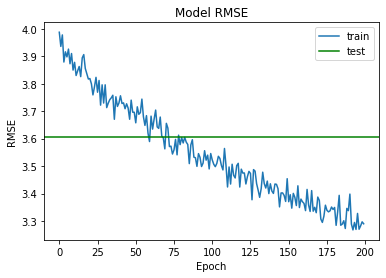

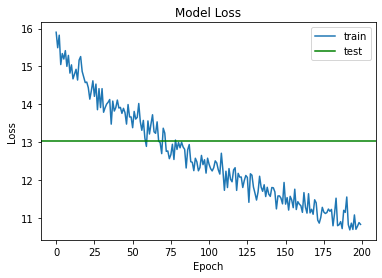

In [29]:
plt.plot(best_history.history['root_mean_squared_error'], label='train')
plt.axhline(test_rmse, color='g', label='test')
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model RMSE vs Epoch for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

plt.plot(best_history.history['loss'], label='train')
plt.axhline(test_loss, color='g', label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model Loss vs Epoch for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

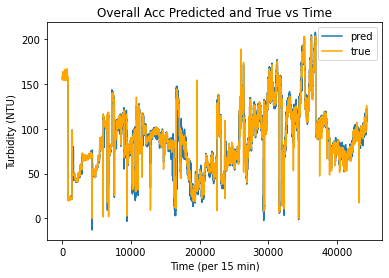

In [30]:
pred = best_model.predict(x_shaped)

plt.plot(pred, label='pred')
plt.plot(y_shaped, color='orange', label='true')
plt.title('Overall Acc Predicted and True vs Time')
plt.ylabel('Turbidity (NTU)')
plt.xlabel('Time (per 15 min)')
plt.legend()
fpath = os.path.join("plots", now + " Overall Acc Predicted and True vs Time for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()


In [31]:
min(y_shaped)

0.13

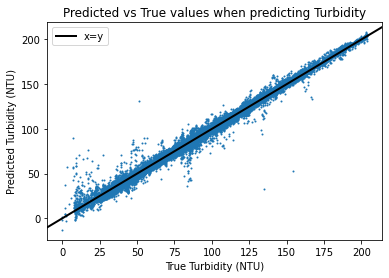

In [32]:
plt.scatter(y_shaped, pred, s=1)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, label="x=y", color='k', lw=2, scalex=False, scaley=False)
plt.title('Predicted vs True values when predicting Turbidity')
plt.xlabel('True Turbidity (NTU)')
plt.ylabel('Predicted Turbidity (NTU)')
plt.legend()
fpath = os.path.join("plots", now + " Predicted vs True values when predicting Turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()